# Introduction

The COVID-19 pandemic has placed immense pressure on hospitals, which serve as the frontline defense against the virus. Rapid and accurate identification of COVID-positive patients is crucial for managing hospital resources, ensuring patient safety, and preventing the virus's spread within healthcare facilities. Traditional methods of diagnosing COVID-19 often rely on extensive manual testing and delayed laboratory results, which can strain hospital workflows and lead to inefficient resource allocation.

This project on exploring correlation of symptoms to cluster patients in order to identif susceptibility group tailored for hospital use. Leveraging patient data such as symptoms, vital signs, and demographic information. By prioritizing the identification of COVID signs we can proactively alert the population of things to watch out for.

# Data  Load

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import scipy.stats as scstat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pycountry

In [98]:
file_path1 = "/workspaces/data-mining/dataset/hospital1.xlsx"
file_path2 = "/workspaces/data-mining/dataset/hospital2.xlsx"

hospital1 = pd.read_excel(file_path1)
hospital2 = pd.read_excel(file_path2)

In [99]:
# Print all data and reset (avoids truncating)
def print_all_df(df_data):
    # Adjust display options
    pd.set_option('display.max_rows', None)  # Show all rows
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', None)  # Expand the display width
    pd.set_option('display.max_colwidth', None)  # Expand the max column width

    print(df_data)

    # Reset to default options if needed
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')

## Function to analyze the hospitals


### Quick look to the data

In [100]:
hospital1.head()

patient ID  patient ID.1 nationality  age gender K=female E=male  \
0    11850006      11850006        T.C.   47                      K   
1     4373630       4373630        T.C.   23                      K   
2    12172023      12172023        T.C.   26                      K   
3    72856168      72856168        T.C.   60                      K   
4    72200559      72200559        T.C.   72                      K   

  date_of_first_symptoms BASVURUTARIHI  fever_temperature  oxygen_saturation  \
0             2022-01-01    2022-01-01               38.2               96.0   
1             2022-01-01    2022-01-01               37.0               96.0   
2             2022-01-01    2022-01-01               38.0               95.0   
3             2022-01-01    2022-01-01               36.5               95.0   
4             2021-12-22    2021-12-22               36.9               96.0   

   history_of_fever  ...  chronic_hematologic_disease  AIDS_HIV  \
0                 0  ...                          0.0       0.0   
1                 1  ...                          0.0       0.0   
2                 1  ...                          0.0       0.0   
3                 0  ...                          0.0       0.0   
4                 0  ...                          0.0       0.0   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                       0.0                       0.0                     0.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                     0.0   
3                       0.0                       0.0                     0.0   
4                       0.0                       0.0                     0.0   

   dementia  tuberculosis  smoking  other_risks  PCR_result  
0       0.0             0        0            0    positive  
1       0.0             0        0            0    positive  
2       0.0             0        0            0    positive  
3       0.0             0        0            0    positive  
4       0.0             0        0            0    positive  

[5 rows x 54 columns]

patient ID  patient ID.1 nationality  age gender K=female E=male  \
0    11850006      11850006        T.C.   47                      K   
1     4373630       4373630        T.C.   23                      K   
2    12172023      12172023        T.C.   26                      K   
3    72856168      72856168        T.C.   60                      K   
4    72200559      72200559        T.C.   72                      K   

  date_of_first_symptoms BASVURUTARIHI  fever_temperature  oxygen_saturation  \
0             2022-01-01    2022-01-01               38.2               96.0   
1             2022-01-01    2022-01-01               37.0               96.0   
2             2022-01-01    2022-01-01               38.0               95.0   
3             2022-01-01    2022-01-01               36.5               95.0   
4             2021-12-22    2021-12-22               36.9               96.0   

   history_of_fever  ...  chronic_hematologic_disease  AIDS_HIV  \
0                 0  ...                          0.0       0.0   
1                 1  ...                          0.0       0.0   
2                 1  ...                          0.0       0.0   
3                 0  ...                          0.0       0.0   
4                 0  ...                          0.0       0.0   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                       0.0                       0.0                     0.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                     0.0   
3                       0.0                       0.0                     0.0   
4                       0.0                       0.0                     0.0   

   dementia  tuberculosis  smoking  other_risks  PCR_result  
0       0.0             0        0            0    positive  
1       0.0             0        0            0    positive  
2       0.0             0        0            0    positive  
3       0.0             0        0            0    positive  
4       0.0             0        0            0    positive  

[5 rows x 54 columns]

In [101]:
hospital2.head()

patient_id  admission_id country_of_residence   age              sex  \
0         NaN           NaN                  NaN   NaN              NaN   
1  88567155.0          45.0                 T.C.  52.0  E=male K=female   
2  36069621.0         181.0                 T.C.  47.0                K   
3  57644199.0          36.0                 T.C.  36.0                K   
4  81365404.0          32.0                 T.C.  30.0                E   

  date_of_first_symptoms      admission_date  fever_temperature  \
0                    NaT                 NaT                NaN   
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                NaN               NaN  ...                            0   
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   

   AIDS_HIV  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0         0                         0                         0   
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   PCR_result  
0         NaN  
1    positive  
2    positive  
3    positive  
4    positive  

[5 rows x 54 columns]

patient_id  admission_id country_of_residence   age              sex  \
0         NaN           NaN                  NaN   NaN              NaN   
1  88567155.0          45.0                 T.C.  52.0  E=male K=female   
2  36069621.0         181.0                 T.C.  47.0                K   
3  57644199.0          36.0                 T.C.  36.0                K   
4  81365404.0          32.0                 T.C.  30.0                E   

  date_of_first_symptoms      admission_date  fever_temperature  \
0                    NaT                 NaT                NaN   
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                NaN               NaN  ...                            0   
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   

   AIDS_HIV  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0         0                         0                         0   
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   PCR_result  
0         NaN  
1    positive  
2    positive  
3    positive  
4    positive  

[5 rows x 54 columns]

### Function

In [102]:
# Wrote this function after observing the data for approximately 5 minutes

def analyze_hospital_data(df):
    """
    Analyze and visualize data from a hospital dataset.

    Parameters:
    - df: DataFrame, the hospital dataset.
    """
    # Automatically identify numerical columns
    numerical_columns = df.select_dtypes(
        include=['float64', 'int64']).columns.tolist()

    symptoms_columns = [
        'history_of_fever', 'cough',
        'sore_throat', 'runny_nose', 'wheezing', 'shortness_of_breath',
        'lower_chest_wall_indrawing', 'chest_pain', 'conjunctivitis',
        'lymphadenopathy', 'headache', 'loss_of_smell', 'loss_of_taste',
        'fatigue_malaise', 'anorexia', 'altered_consciousness_confusion',
        'muscle_aches', 'joint_pain', 'inability_to_walk', 'abdominal_pain',
        'diarrhoea', 'vomiting_nausea', 'skin_rash', 'bleeding', 'other_symptoms',
        'chronic_cardiac_disease', 'hypertension', 'chronic_pulmonary_disease',
        'asthma', 'chronic_kidney_disease', 'obesity', 'liver_disease', 'asplenia',
        'chronic_neurological_disorder', 'malignant_neoplasm',
        'chronic_hematologic_disease', 'AIDS_HIV', 'diabetes_mellitus_type_1',
        'diabetes_mellitus_type_2', 'rheumatologic_disorder', 'dementia',
        'tuberculosis', 'smoking', 'other_risks'
    ]

    # Automatically identify date column
    date_column = 'admission_date' if 'admission_date' in df.columns else None

    # Automatically identify gender column
    gender_column = [
        col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower()]
    gender_column = gender_column[0] if gender_column else None

    # 1. General information about the dataset
    print("Dataset Information:\n")
    df.info()
    print("\nColumn Names:\n", df.columns.tolist())
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nBasic Statistics:\n", df.describe())
    print("\nNumber of Duplicate Rows:\n", df.duplicated().sum())

    # 2. Correlation Heatmap
    print("\nGenerating Correlation Heatmap...")
    correlation_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        linewidths=0.5,
    )
    plt.title('Correlation Heatmap', fontsize=20, pad=20)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # 3. Distribution of Fever Temperatures
    if 'fever_temperature' in df.columns:
        print("\nGenerating Fever Temperature Distribution...")
        plt.figure(figsize=(12, 6))
        df['fever_temperature'].hist(bins=30, edgecolor='black', alpha=0.7)
        plt.title('Distribution of Fever Temperatures', fontsize=16, pad=20)
        plt.xlabel('Fever Temperature (°C)', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 4. Gender Distribution
    if gender_column:
        print("\nGenerating Gender Distribution...")
        plt.figure(figsize=(12, 6))
        df[gender_column].value_counts().plot(
            kind='bar', edgecolor='black', alpha=0.7)
        plt.title('Gender Distribution of Patients', fontsize=16, pad=20)
        plt.xlabel('Gender', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # 5. Frequency of Each Symptom
    if symptoms_columns:

        print("\nCheck if any symptoms column has abnormal values")
        for symptom in symptoms_columns:
            values = hospital1[symptom].unique()
            if len(values) != 2:
                print("Column {} has {} values!".format(
                    symptom, values.tolist()))

        print("\nGenerating Symptom Frequency Distribution (Top 20)...")

        # Calculate the sum for each symptom and sort by frequency
        symptom_counts = df[symptoms_columns].sum(
        ).sort_values(ascending=False)

        # Select the top 20 symptoms
        top_20_symptoms = symptom_counts.head(20)

        # Plot the top 20 symptoms
        top_20_symptoms.plot(kind='bar', figsize=(
            16, 8), edgecolor='black', alpha=0.7)

        # Add titles and labels
        plt.title('Top 20 Most Frequent Symptoms', fontsize=16, pad=20)
        plt.xlabel('Symptoms', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## Analyzing hospital1

In [103]:
# Taking a quick look to the data
hospital1.head()

patient ID  patient ID.1 nationality  age gender K=female E=male  \
0    11850006      11850006        T.C.   47                      K   
1     4373630       4373630        T.C.   23                      K   
2    12172023      12172023        T.C.   26                      K   
3    72856168      72856168        T.C.   60                      K   
4    72200559      72200559        T.C.   72                      K   

  date_of_first_symptoms BASVURUTARIHI  fever_temperature  oxygen_saturation  \
0             2022-01-01    2022-01-01               38.2               96.0   
1             2022-01-01    2022-01-01               37.0               96.0   
2             2022-01-01    2022-01-01               38.0               95.0   
3             2022-01-01    2022-01-01               36.5               95.0   
4             2021-12-22    2021-12-22               36.9               96.0   

   history_of_fever  ...  chronic_hematologic_disease  AIDS_HIV  \
0                 0  ...                          0.0       0.0   
1                 1  ...                          0.0       0.0   
2                 1  ...                          0.0       0.0   
3                 0  ...                          0.0       0.0   
4                 0  ...                          0.0       0.0   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                       0.0                       0.0                     0.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                     0.0   
3                       0.0                       0.0                     0.0   
4                       0.0                       0.0                     0.0   

   dementia  tuberculosis  smoking  other_risks  PCR_result  
0       0.0             0        0            0    positive  
1       0.0             0        0            0    positive  
2       0.0             0        0            0    positive  
3       0.0             0        0            0    positive  
4       0.0             0        0            0    positive  

[5 rows x 54 columns]

patient ID  patient ID.1 nationality  age gender K=female E=male  \
0    11850006      11850006        T.C.   47                      K   
1     4373630       4373630        T.C.   23                      K   
2    12172023      12172023        T.C.   26                      K   
3    72856168      72856168        T.C.   60                      K   
4    72200559      72200559        T.C.   72                      K   

  date_of_first_symptoms BASVURUTARIHI  fever_temperature  oxygen_saturation  \
0             2022-01-01    2022-01-01               38.2               96.0   
1             2022-01-01    2022-01-01               37.0               96.0   
2             2022-01-01    2022-01-01               38.0               95.0   
3             2022-01-01    2022-01-01               36.5               95.0   
4             2021-12-22    2021-12-22               36.9               96.0   

   history_of_fever  ...  chronic_hematologic_disease  AIDS_HIV  \
0                 0  ...                          0.0       0.0   
1                 1  ...                          0.0       0.0   
2                 1  ...                          0.0       0.0   
3                 0  ...                          0.0       0.0   
4                 0  ...                          0.0       0.0   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                       0.0                       0.0                     0.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                     0.0   
3                       0.0                       0.0                     0.0   
4                       0.0                       0.0                     0.0   

   dementia  tuberculosis  smoking  other_risks  PCR_result  
0       0.0             0        0            0    positive  
1       0.0             0        0            0    positive  
2       0.0             0        0            0    positive  
3       0.0             0        0            0    positive  
4       0.0             0        0            0    positive  

[5 rows x 54 columns]

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient ID                       14712 non-null  int64         
 1   patient ID.1                     14712 non-null  int64         
 2   nationality                      14712 non-null  object        
 3   age                              14712 non-null  int64         
 4   gender K=female E=male           14712 non-null  object        
 5   date_of_first_symptoms           14712 non-null  datetime64[ns]
 6   BASVURUTARIHI                    14712 non-null  datetime64[ns]
 7   fever_temperature                14244 non-null  float64       
 8   oxygen_saturation                14708 non-null  float64       
 9   history_of_fever                 14712 non-null  int64         
 10  cough                            147

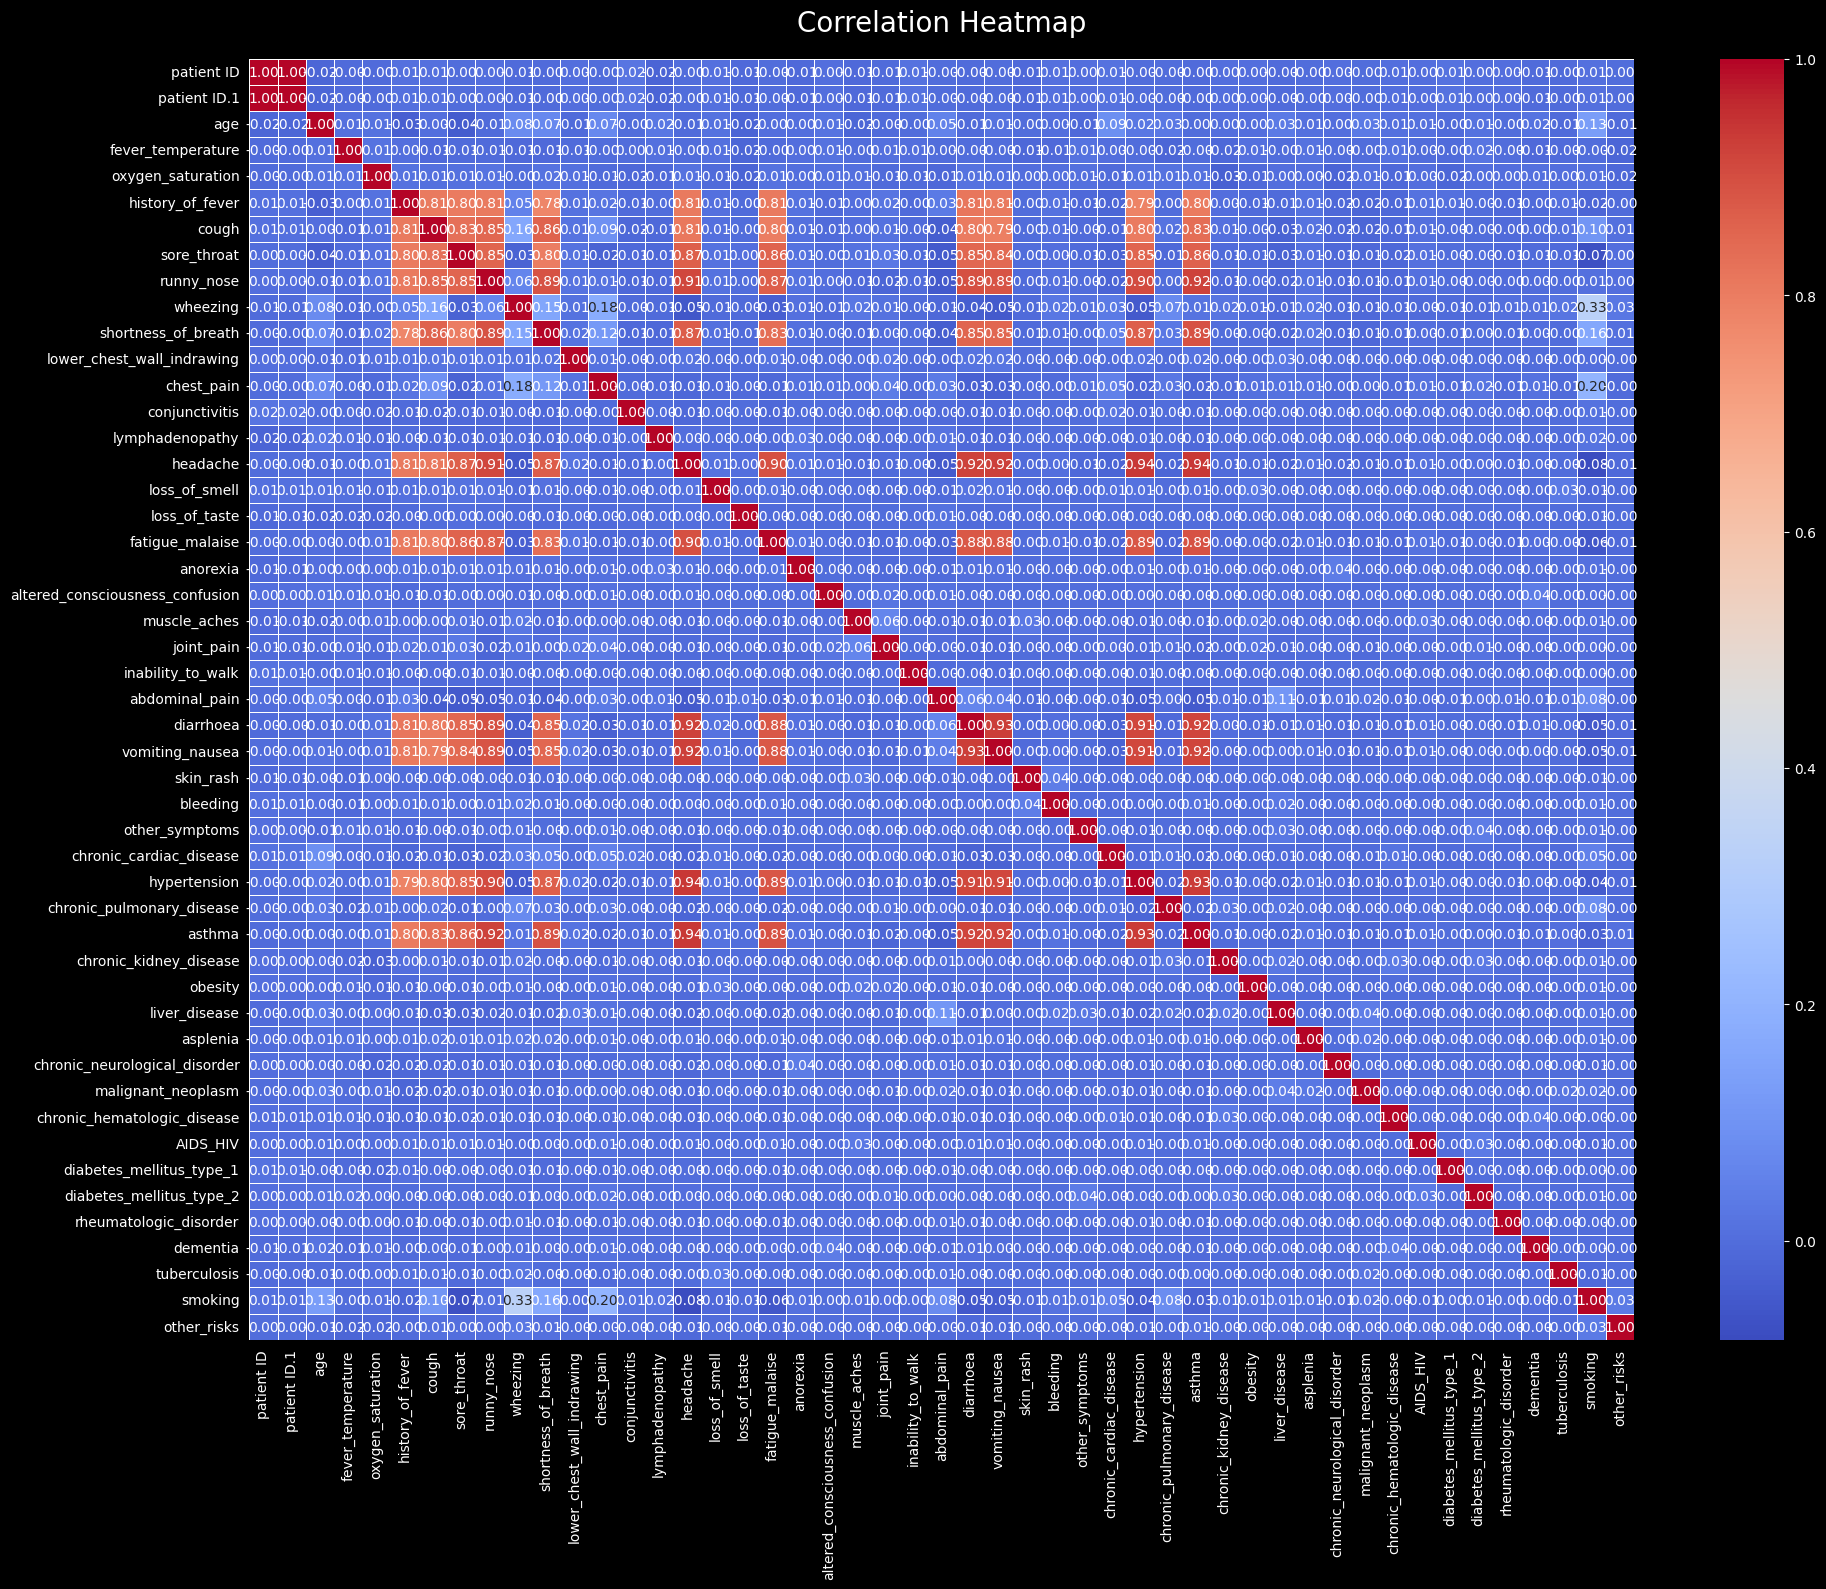


Generating Fever Temperature Distribution...


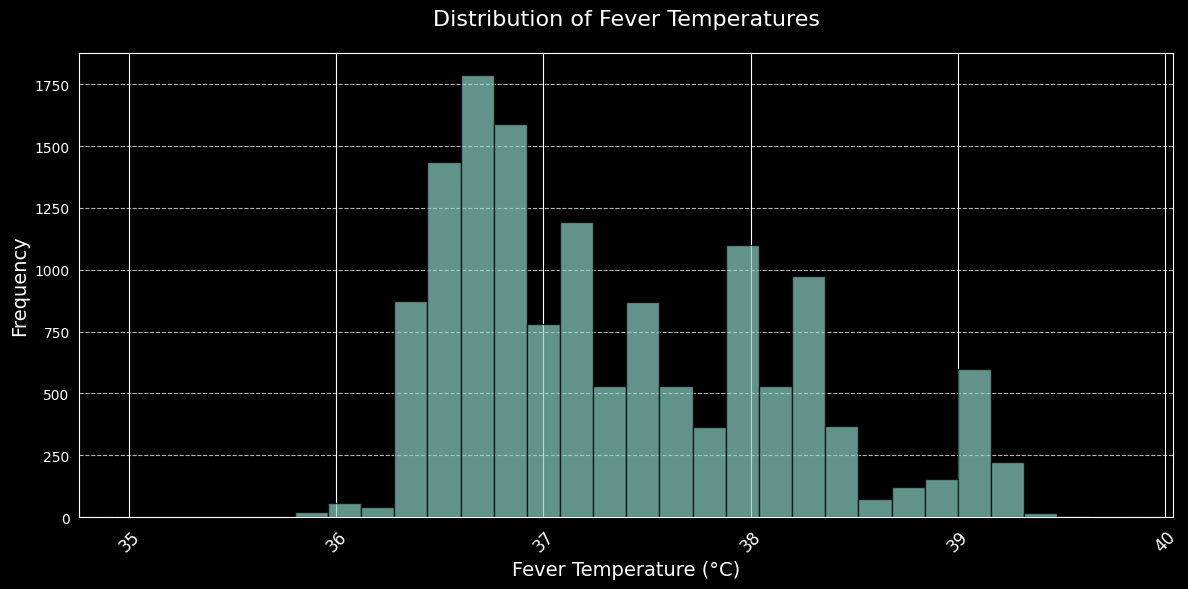


Generating Gender Distribution...


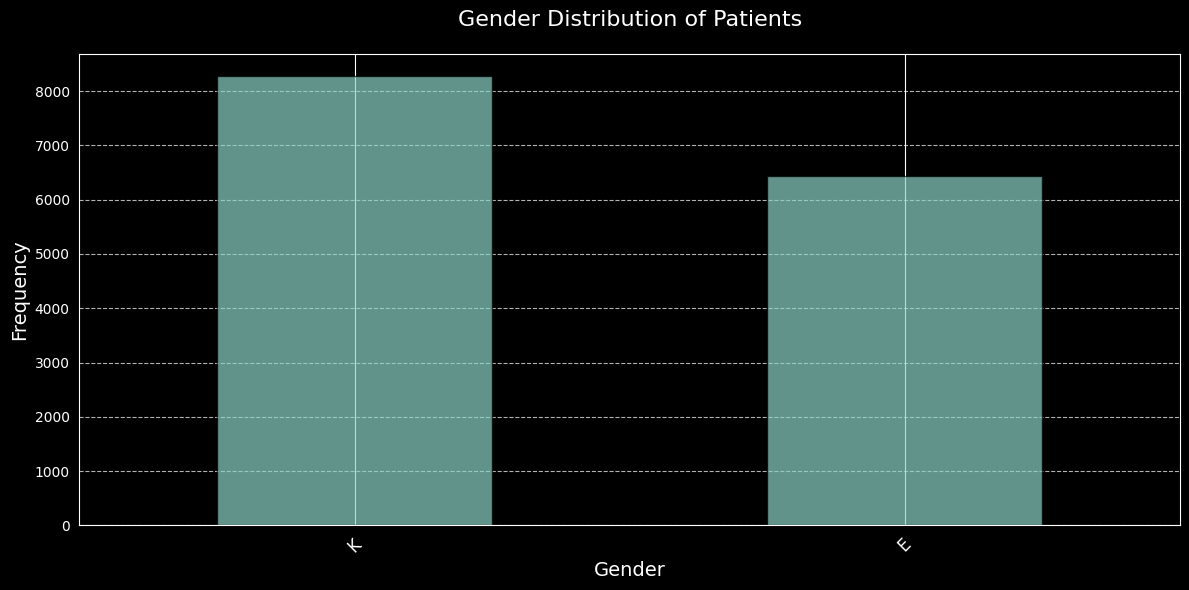


Check if any symptoms column has abnormal values
Column chronic_kidney_disease has [0.0, 1.0, nan] values!
Column obesity has [0.0, 1.0, nan] values!
Column liver_disease has [0.0, 1.0, nan] values!
Column asplenia has [0.0, 1.0, nan] values!
Column chronic_neurological_disorder has [0.0, nan, 1.0] values!
Column chronic_hematologic_disease has [0.0, nan, 1.0] values!
Column AIDS_HIV has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_1 has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_2 has [0.0, nan, 1.0] values!
Column rheumatologic_disorder has [0.0, nan, 1.0] values!
Column dementia has [0.0, nan, 1.0] values!

Generating Symptom Frequency Distribution (Top 20)...


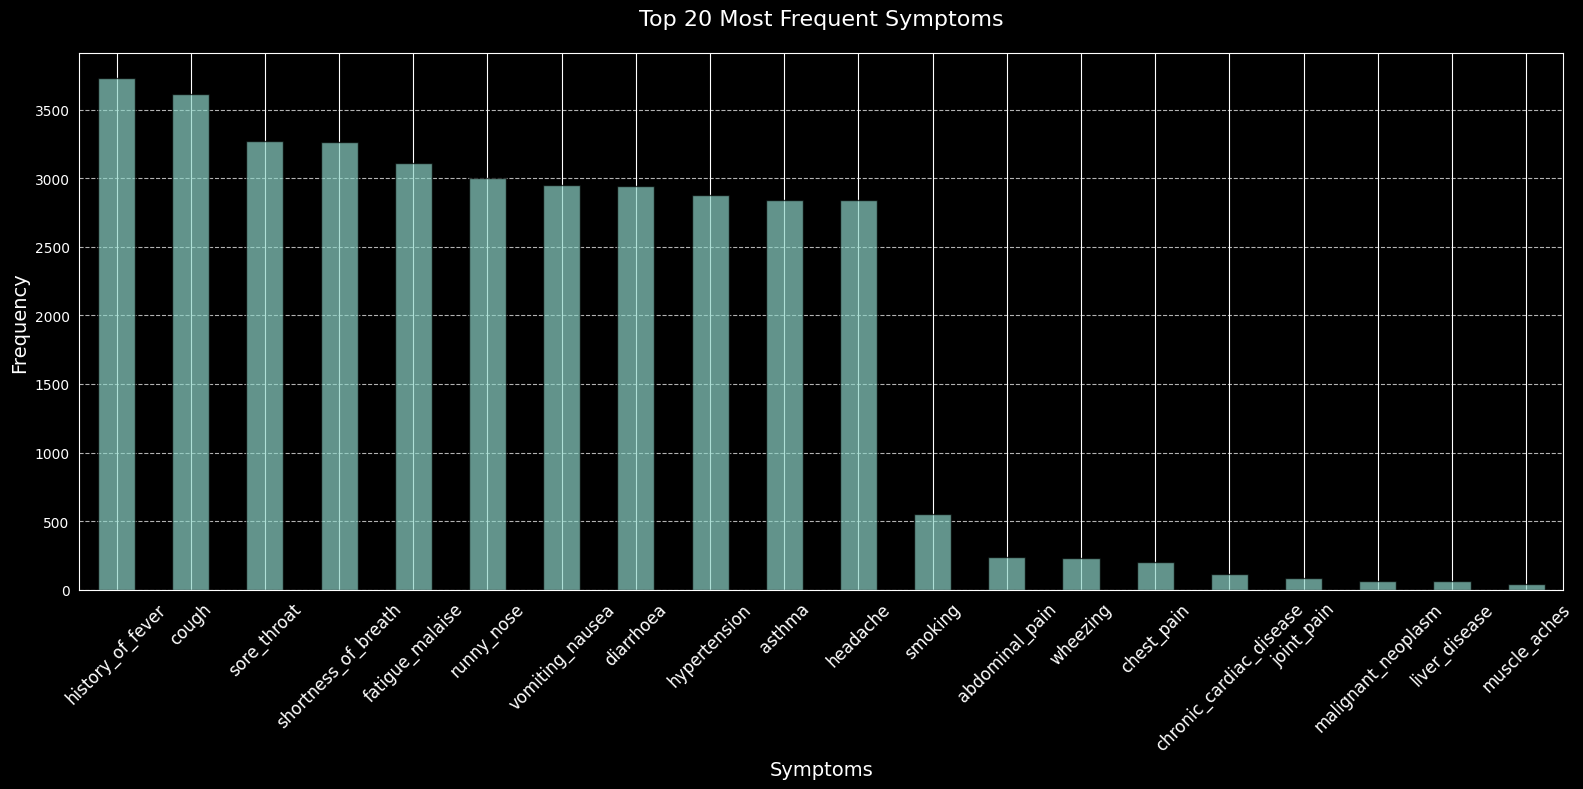

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient ID                       14712 non-null  int64         
 1   patient ID.1                     14712 non-null  int64         
 2   nationality                      14712 non-null  object        
 3   age                              14712 non-null  int64         
 4   gender K=female E=male           14712 non-null  object        
 5   date_of_first_symptoms           14712 non-null  datetime64[ns]
 6   BASVURUTARIHI                    14712 non-null  datetime64[ns]
 7   fever_temperature                14244 non-null  float64       
 8   oxygen_saturation                14708 non-null  float64       
 9   history_of_fever                 14712 non-null  int64         
 10  cough                            147

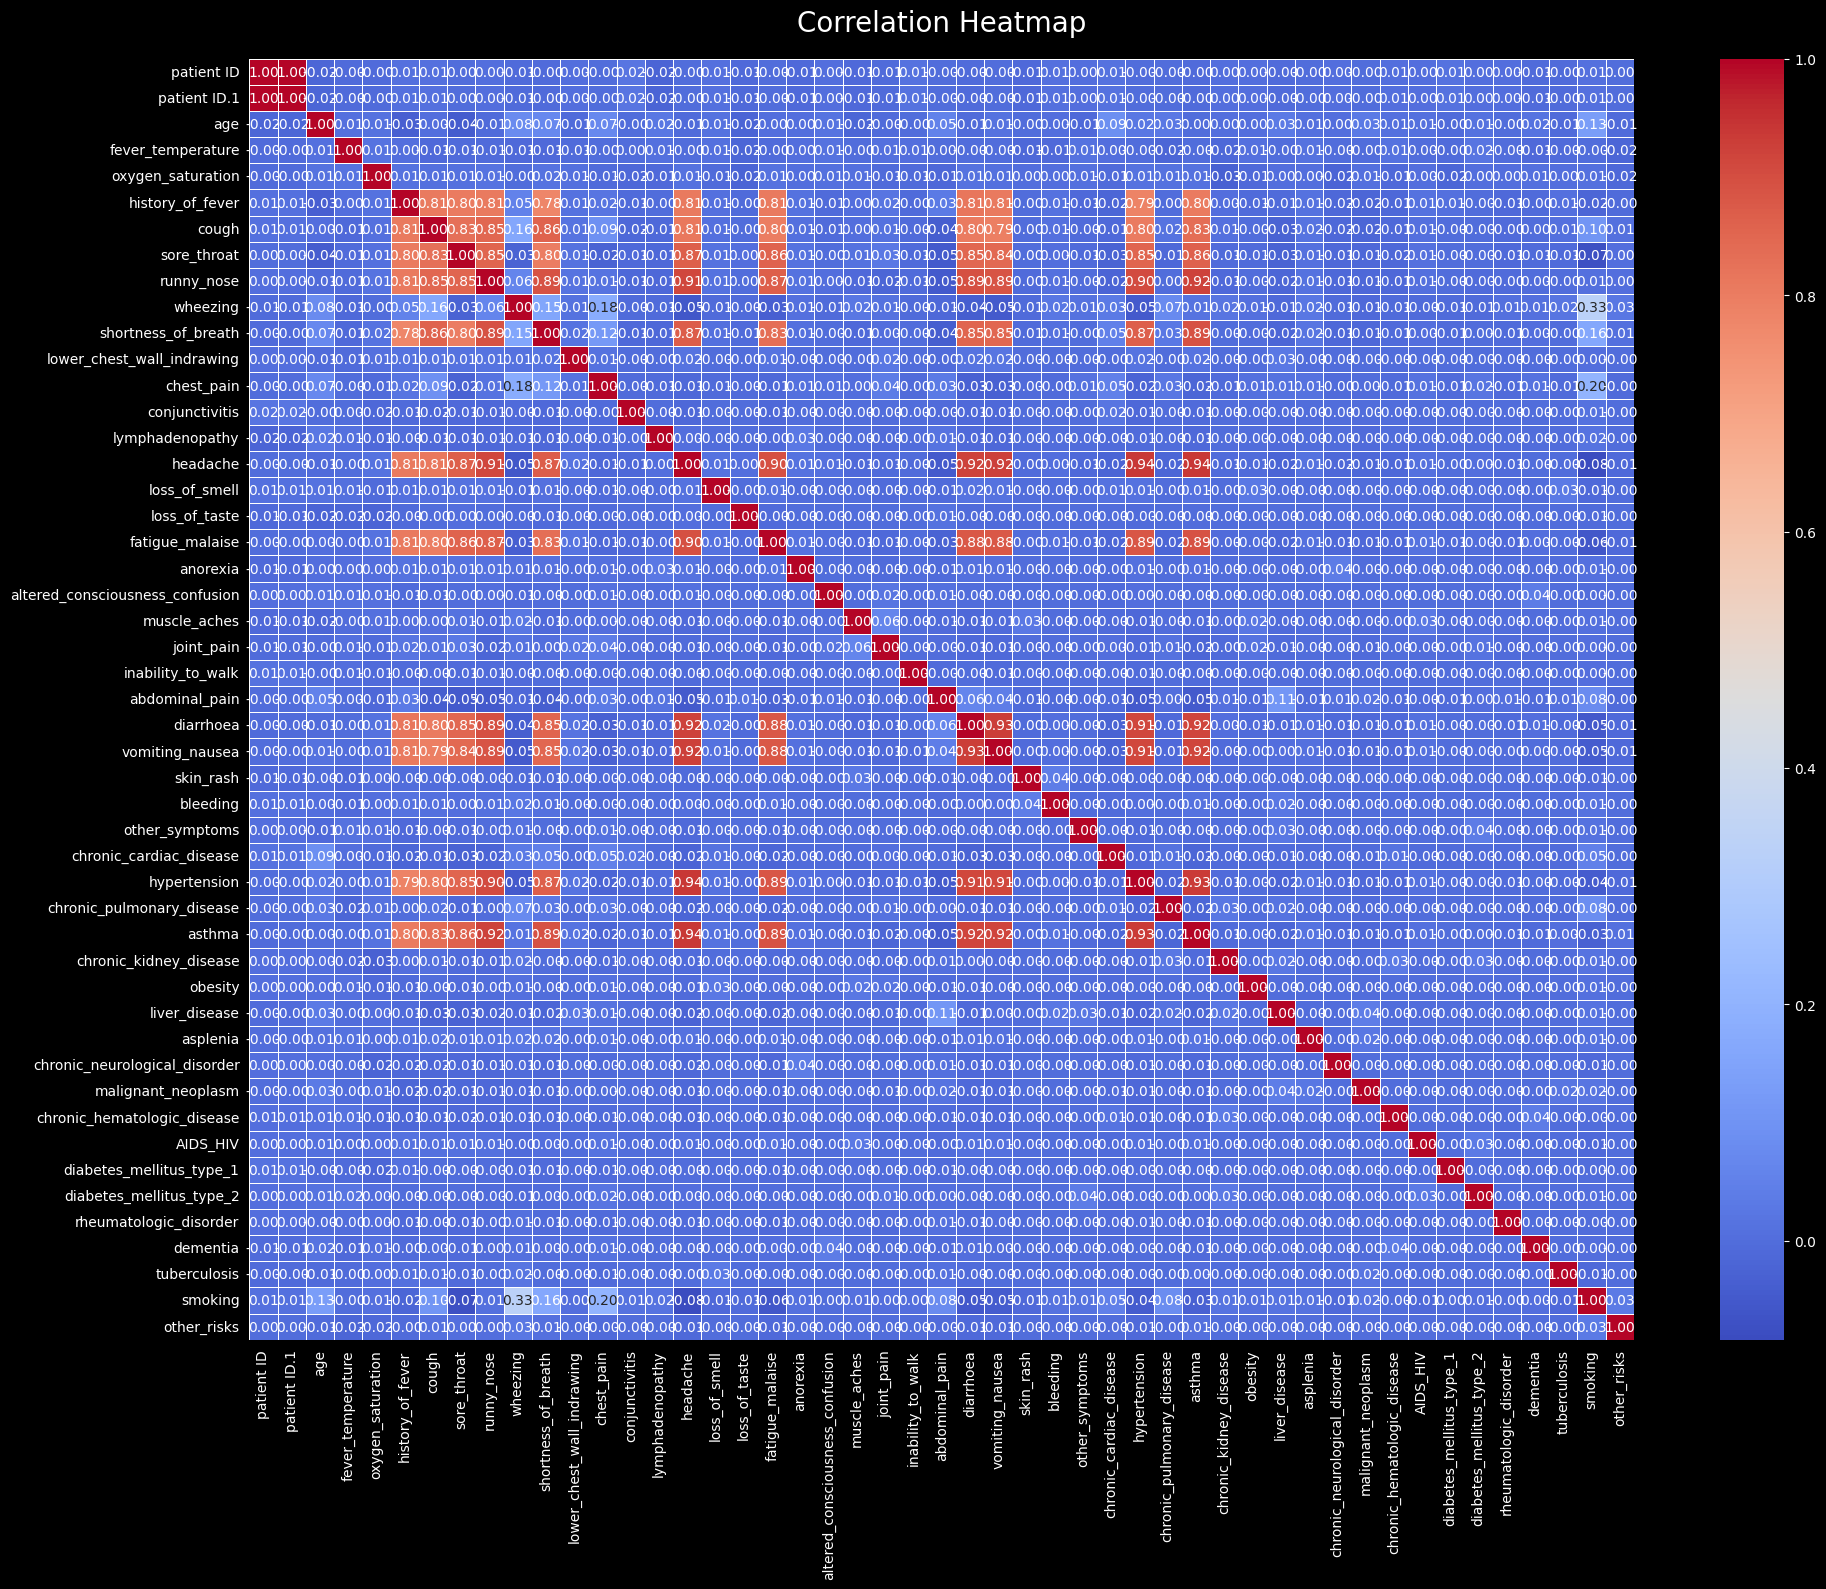


Generating Fever Temperature Distribution...


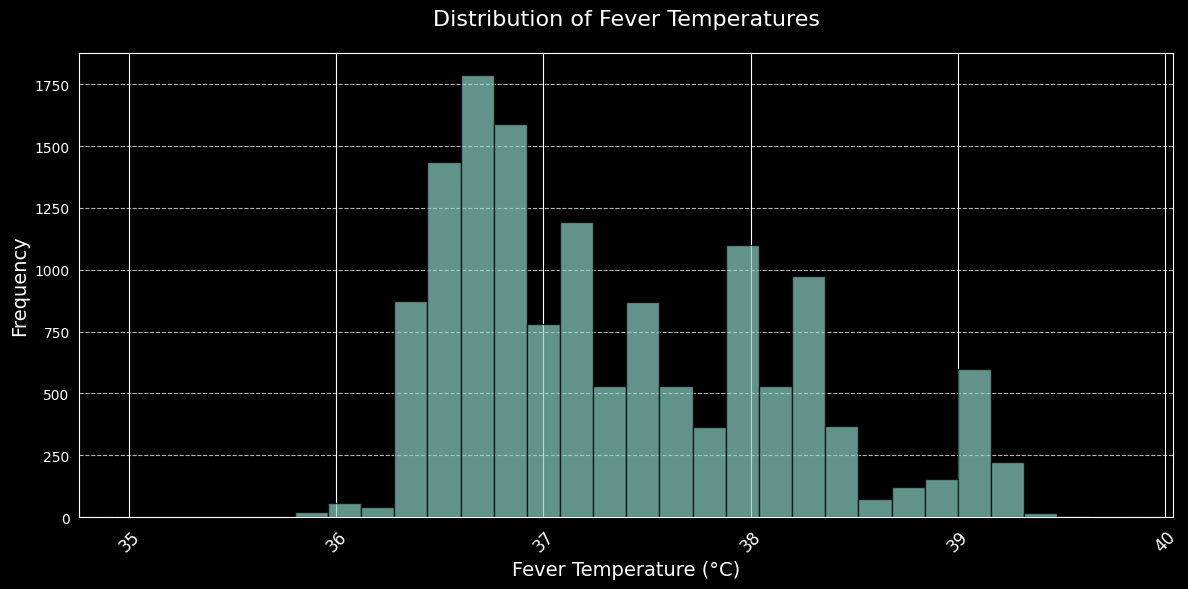


Generating Gender Distribution...


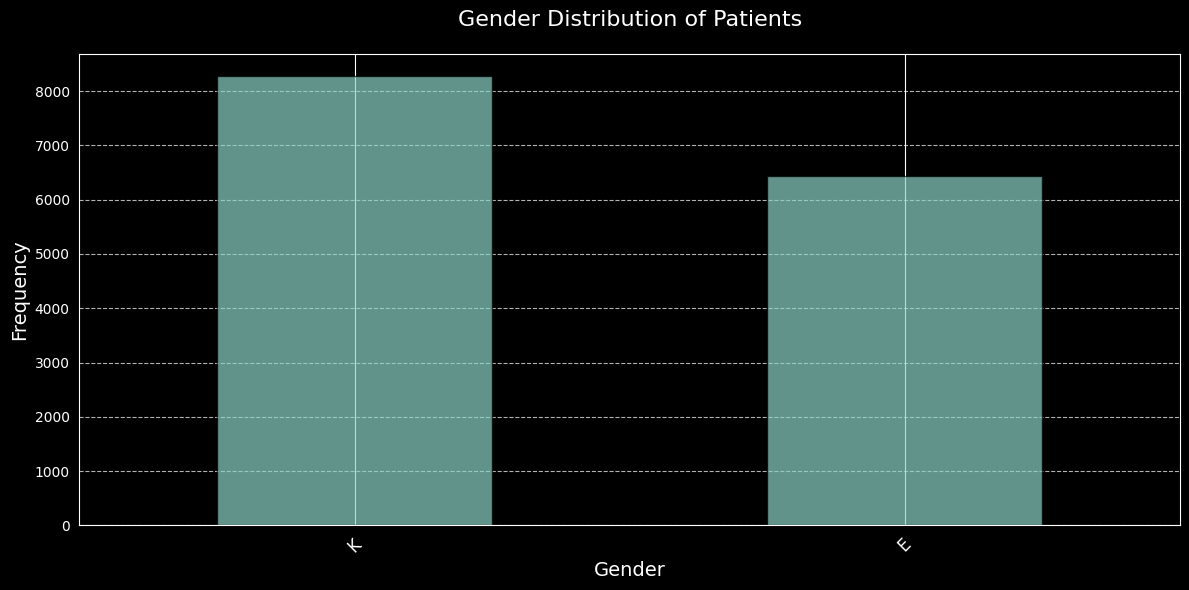


Check if any symptoms column has abnormal values
Column chronic_kidney_disease has [0.0, 1.0, nan] values!
Column obesity has [0.0, 1.0, nan] values!
Column liver_disease has [0.0, 1.0, nan] values!
Column asplenia has [0.0, 1.0, nan] values!
Column chronic_neurological_disorder has [0.0, nan, 1.0] values!
Column chronic_hematologic_disease has [0.0, nan, 1.0] values!
Column AIDS_HIV has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_1 has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_2 has [0.0, nan, 1.0] values!
Column rheumatologic_disorder has [0.0, nan, 1.0] values!
Column dementia has [0.0, nan, 1.0] values!

Generating Symptom Frequency Distribution (Top 20)...


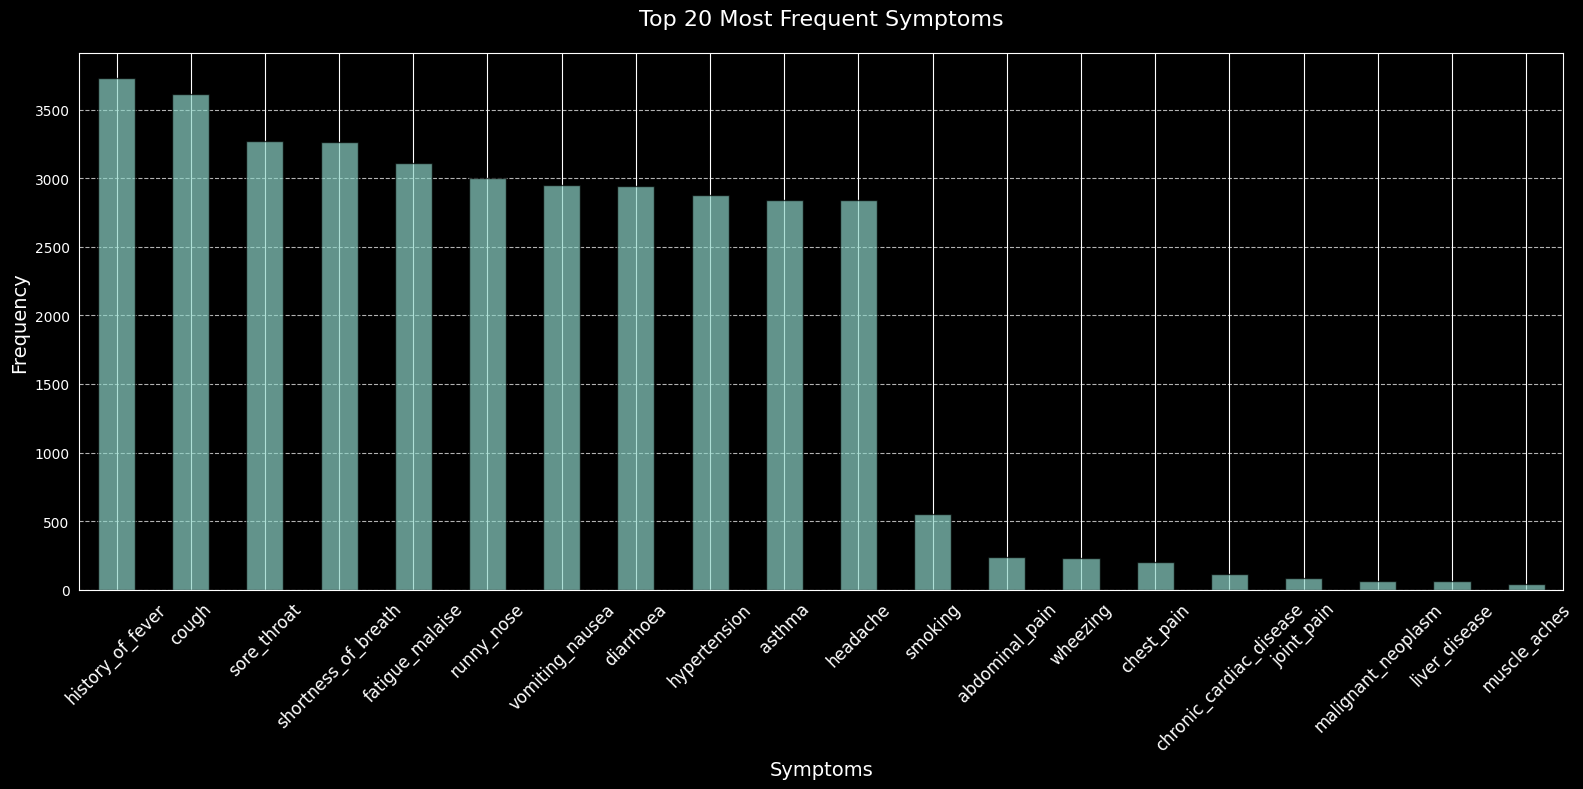

In [104]:
# Analyzing hospital 1
analyze_hospital_data(hospital1)

### Data Observations of hospital1

- patient ID and patient ID.1 are exactly the same based on the correlation matrix

- data types needs to be modified (fever_temperature) (goal is to make every column the same data type as in hospital2, only the temperatue float the other numberic data will be integer

- many missing values in  PCR_results: 1176 --> 0: negative, 1:positive, 2: no result)

- no duplicate rows

- column names needs to be standardized (turkish admission date :D )

- High variation is presented in important traits such as high temperatures, consider maybe reduce dataset

- Symptoms columns present nan values

## Analyzing hospital2

In [105]:
# Taking a quick look to the data
hospital2.head()

patient_id  admission_id country_of_residence   age              sex  \
0         NaN           NaN                  NaN   NaN              NaN   
1  88567155.0          45.0                 T.C.  52.0  E=male K=female   
2  36069621.0         181.0                 T.C.  47.0                K   
3  57644199.0          36.0                 T.C.  36.0                K   
4  81365404.0          32.0                 T.C.  30.0                E   

  date_of_first_symptoms      admission_date  fever_temperature  \
0                    NaT                 NaT                NaN   
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                NaN               NaN  ...                            0   
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   

   AIDS_HIV  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0         0                         0                         0   
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   PCR_result  
0         NaN  
1    positive  
2    positive  
3    positive  
4    positive  

[5 rows x 54 columns]

patient_id  admission_id country_of_residence   age              sex  \
0         NaN           NaN                  NaN   NaN              NaN   
1  88567155.0          45.0                 T.C.  52.0  E=male K=female   
2  36069621.0         181.0                 T.C.  47.0                K   
3  57644199.0          36.0                 T.C.  36.0                K   
4  81365404.0          32.0                 T.C.  30.0                E   

  date_of_first_symptoms      admission_date  fever_temperature  \
0                    NaT                 NaT                NaN   
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
0                NaN               NaN  ...                            0   
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   

   AIDS_HIV  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0         0                         0                         0   
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   PCR_result  
0         NaN  
1    positive  
2    positive  
3    positive  
4    positive  

[5 rows x 54 columns]

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient_id                       12734 non-null  float64       
 1   admission_id                     12734 non-null  float64       
 2   country_of_residence             12734 non-null  object        
 3   age                              12734 non-null  float64       
 4   sex                              12734 non-null  object        
 5   date_of_first_symptoms           12734 non-null  datetime64[ns]
 6   admission_date                   12734 non-null  datetime64[ns]
 7   fever_temperature                11515 non-null  float64       
 8   oxygen_saturation                12730 non-null  float64       
 9   history_of_fever                 12729 non-null  float64       
 10  cough                            127

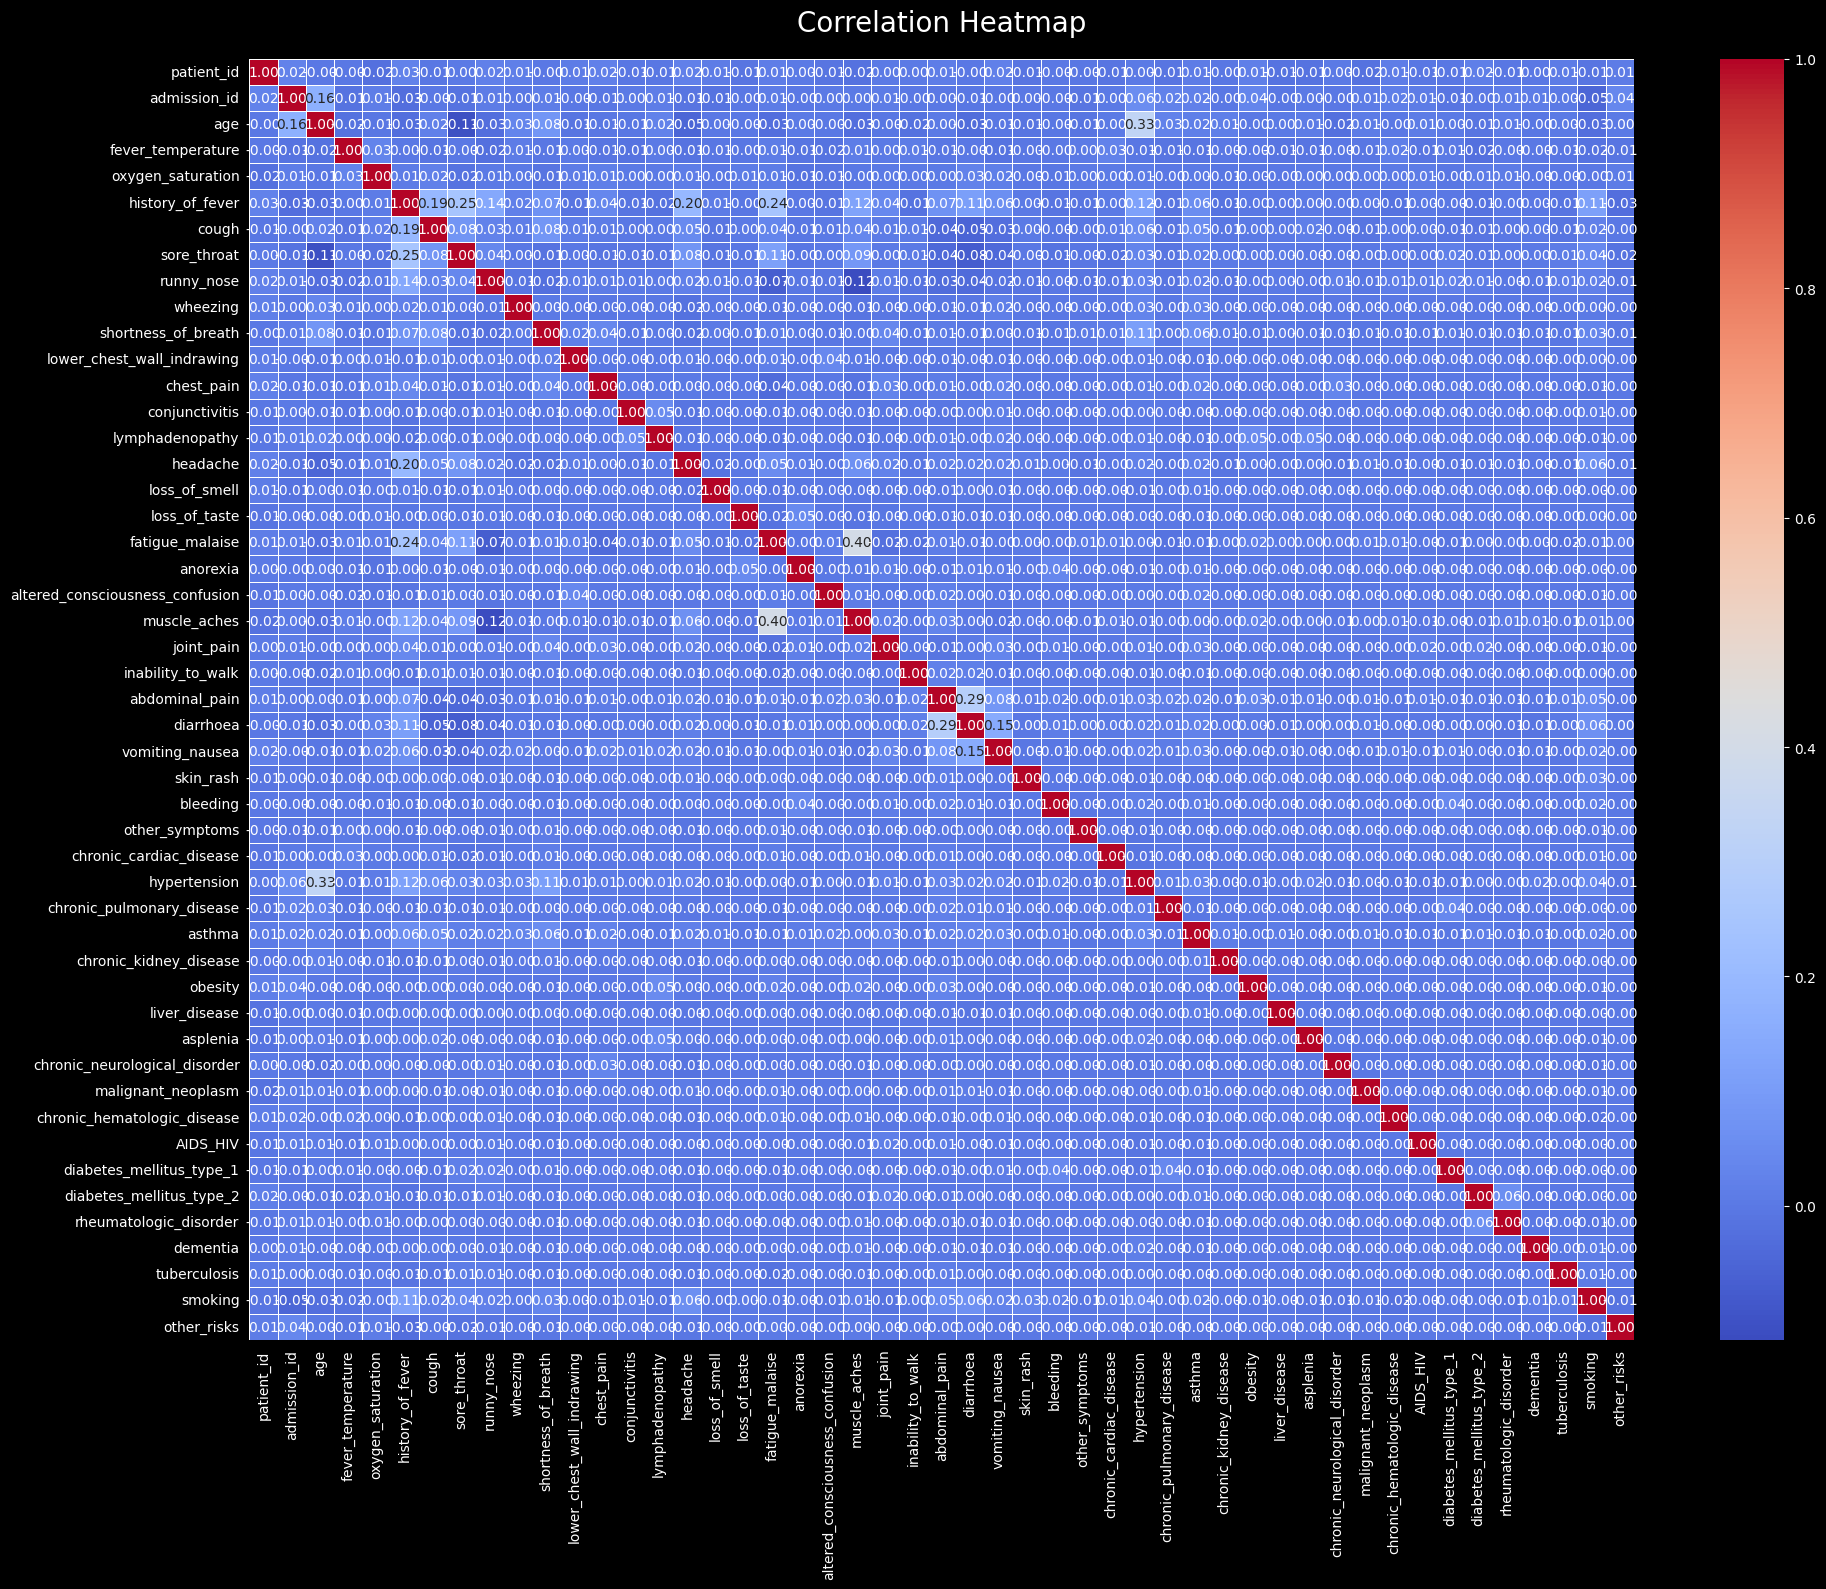


Generating Fever Temperature Distribution...


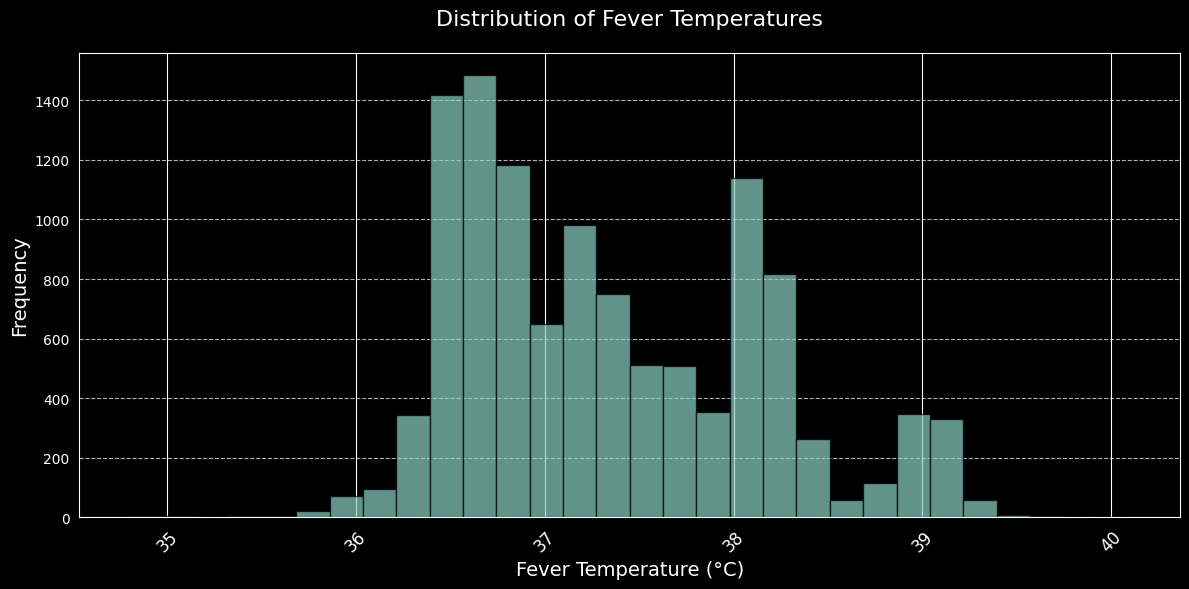


Generating Gender Distribution...


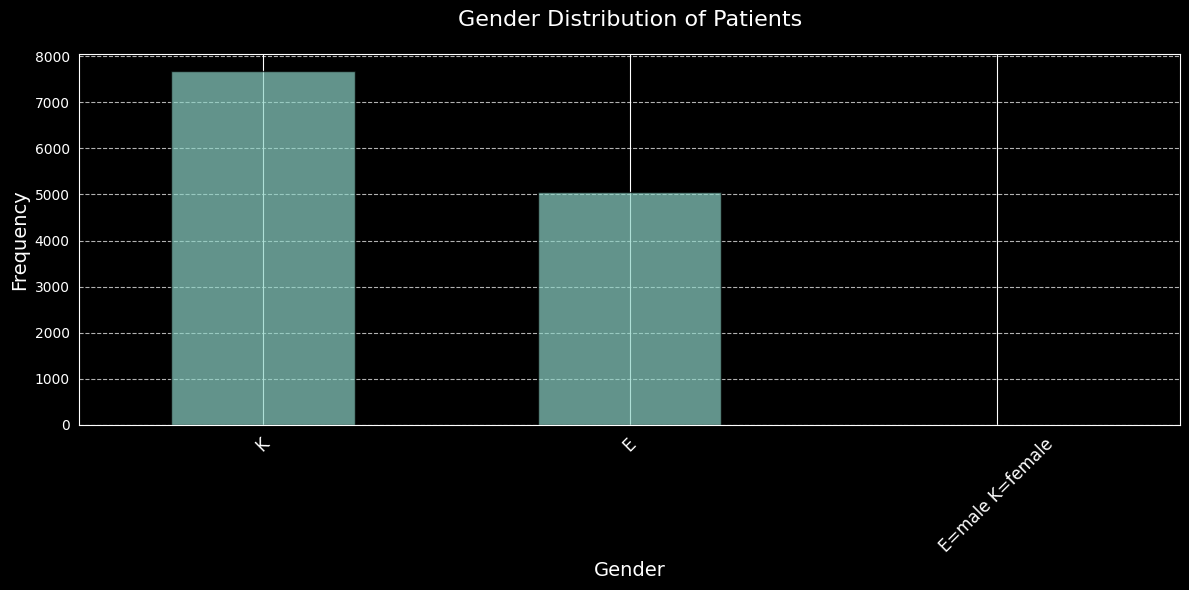


Check if any symptoms column has abnormal values
Column chronic_kidney_disease has [0.0, 1.0, nan] values!
Column obesity has [0.0, 1.0, nan] values!
Column liver_disease has [0.0, 1.0, nan] values!
Column asplenia has [0.0, 1.0, nan] values!
Column chronic_neurological_disorder has [0.0, nan, 1.0] values!
Column chronic_hematologic_disease has [0.0, nan, 1.0] values!
Column AIDS_HIV has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_1 has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_2 has [0.0, nan, 1.0] values!
Column rheumatologic_disorder has [0.0, nan, 1.0] values!
Column dementia has [0.0, nan, 1.0] values!

Generating Symptom Frequency Distribution (Top 20)...


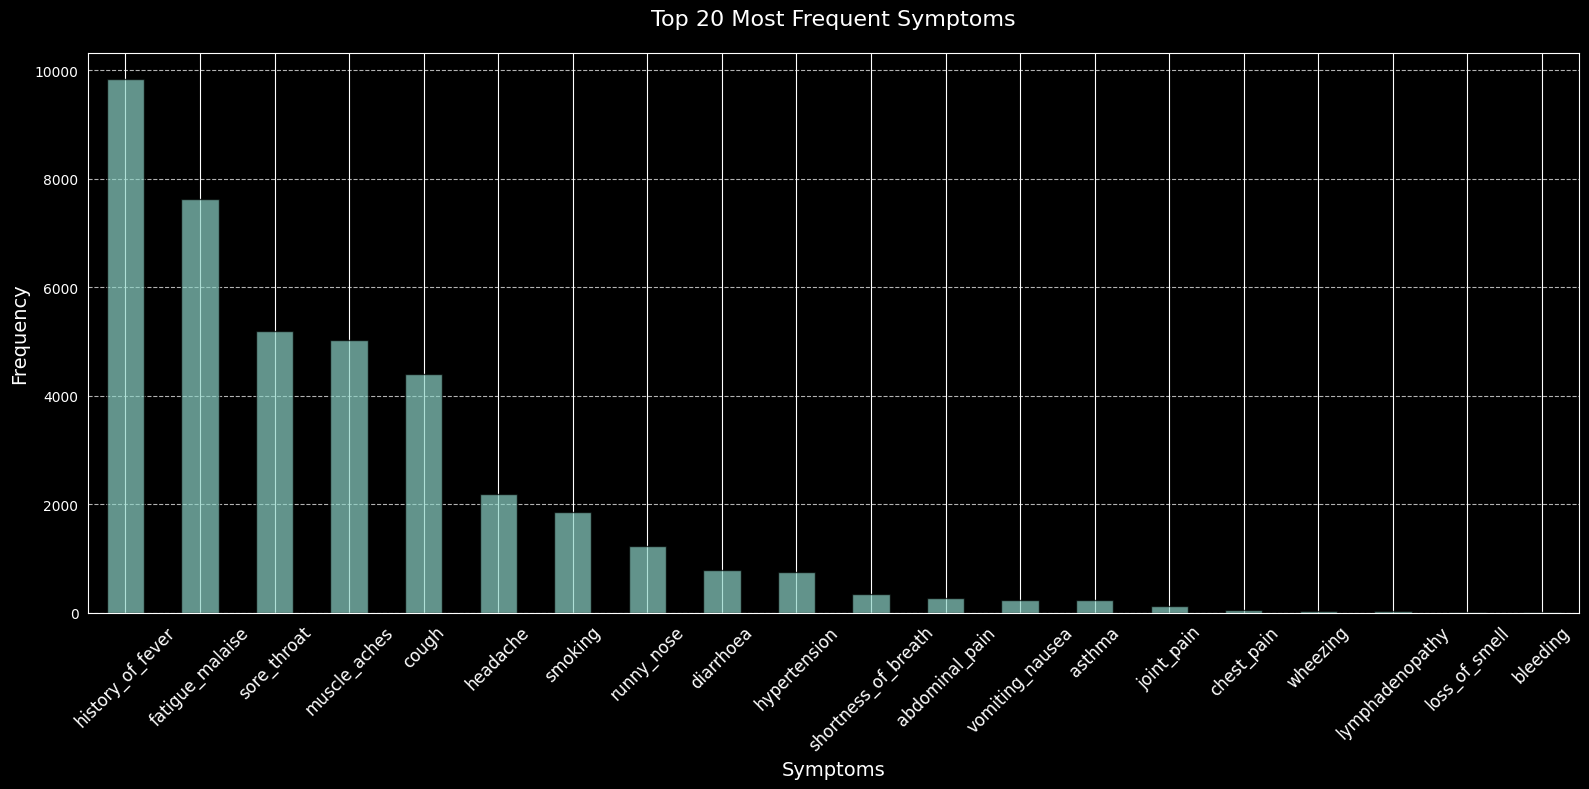

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   patient_id                       12734 non-null  float64       
 1   admission_id                     12734 non-null  float64       
 2   country_of_residence             12734 non-null  object        
 3   age                              12734 non-null  float64       
 4   sex                              12734 non-null  object        
 5   date_of_first_symptoms           12734 non-null  datetime64[ns]
 6   admission_date                   12734 non-null  datetime64[ns]
 7   fever_temperature                11515 non-null  float64       
 8   oxygen_saturation                12730 non-null  float64       
 9   history_of_fever                 12729 non-null  float64       
 10  cough                            127

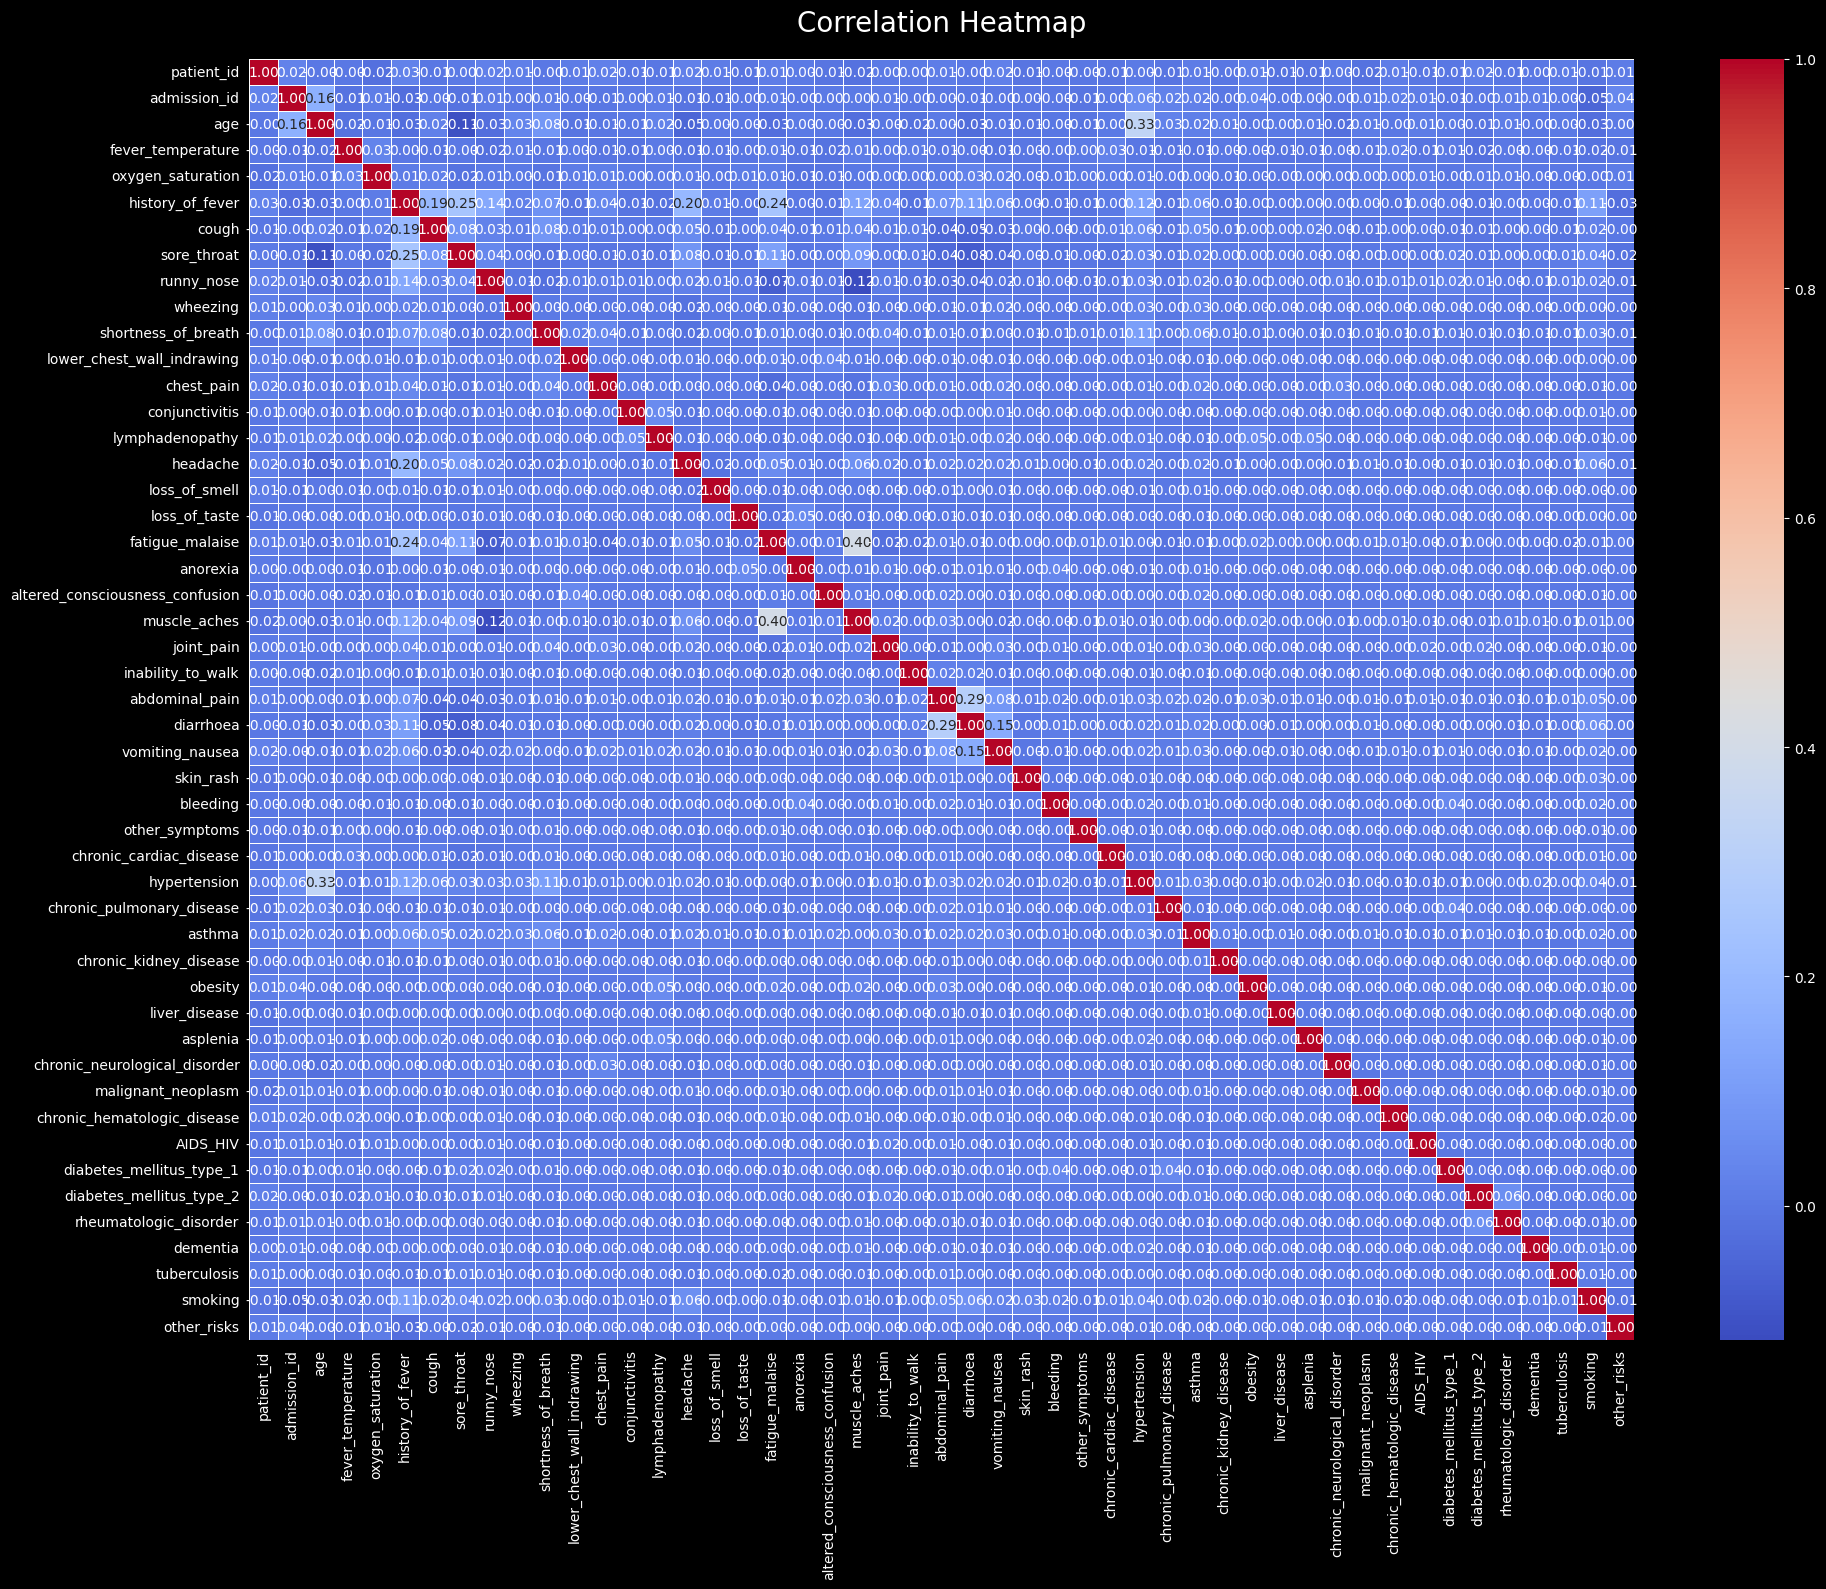


Generating Fever Temperature Distribution...


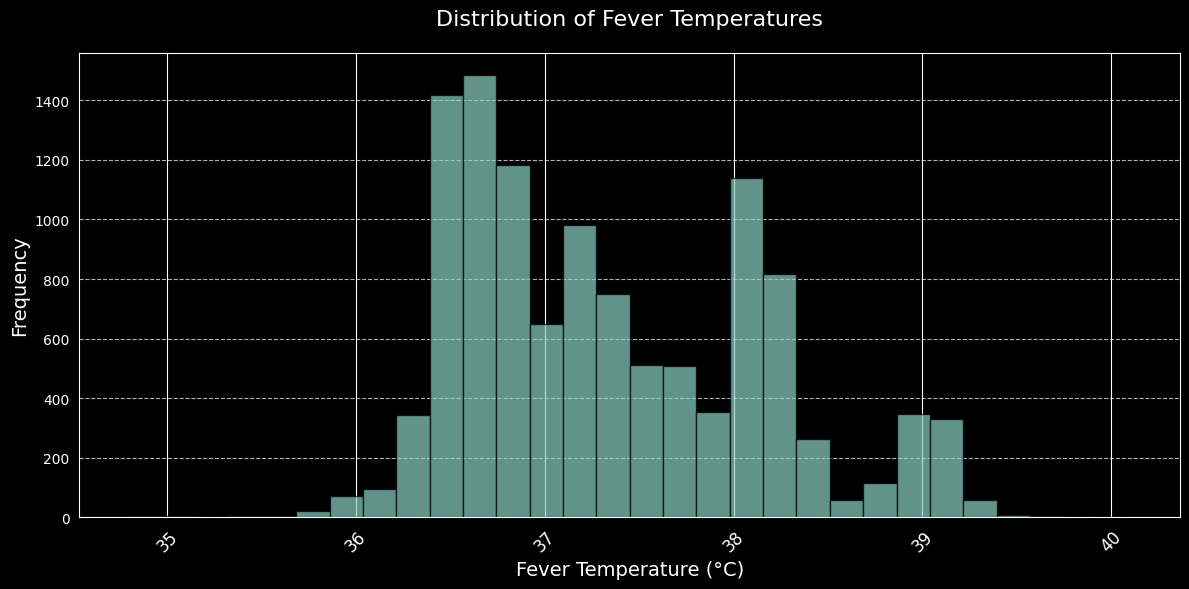


Generating Gender Distribution...


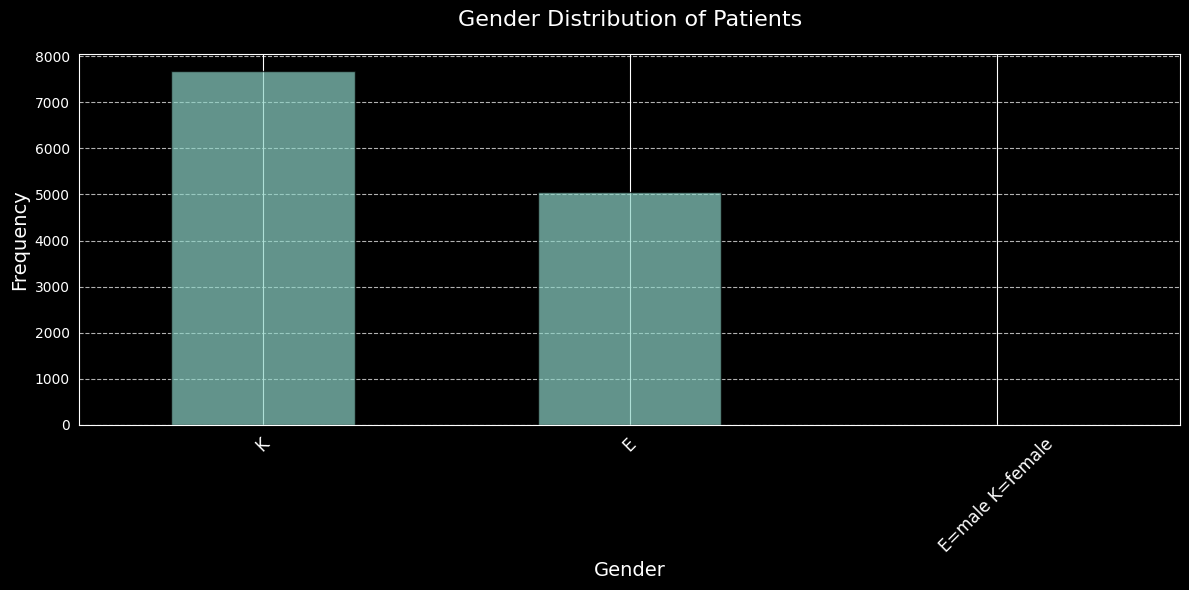


Check if any symptoms column has abnormal values
Column chronic_kidney_disease has [0.0, 1.0, nan] values!
Column obesity has [0.0, 1.0, nan] values!
Column liver_disease has [0.0, 1.0, nan] values!
Column asplenia has [0.0, 1.0, nan] values!
Column chronic_neurological_disorder has [0.0, nan, 1.0] values!
Column chronic_hematologic_disease has [0.0, nan, 1.0] values!
Column AIDS_HIV has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_1 has [0.0, nan, 1.0] values!
Column diabetes_mellitus_type_2 has [0.0, nan, 1.0] values!
Column rheumatologic_disorder has [0.0, nan, 1.0] values!
Column dementia has [0.0, nan, 1.0] values!

Generating Symptom Frequency Distribution (Top 20)...


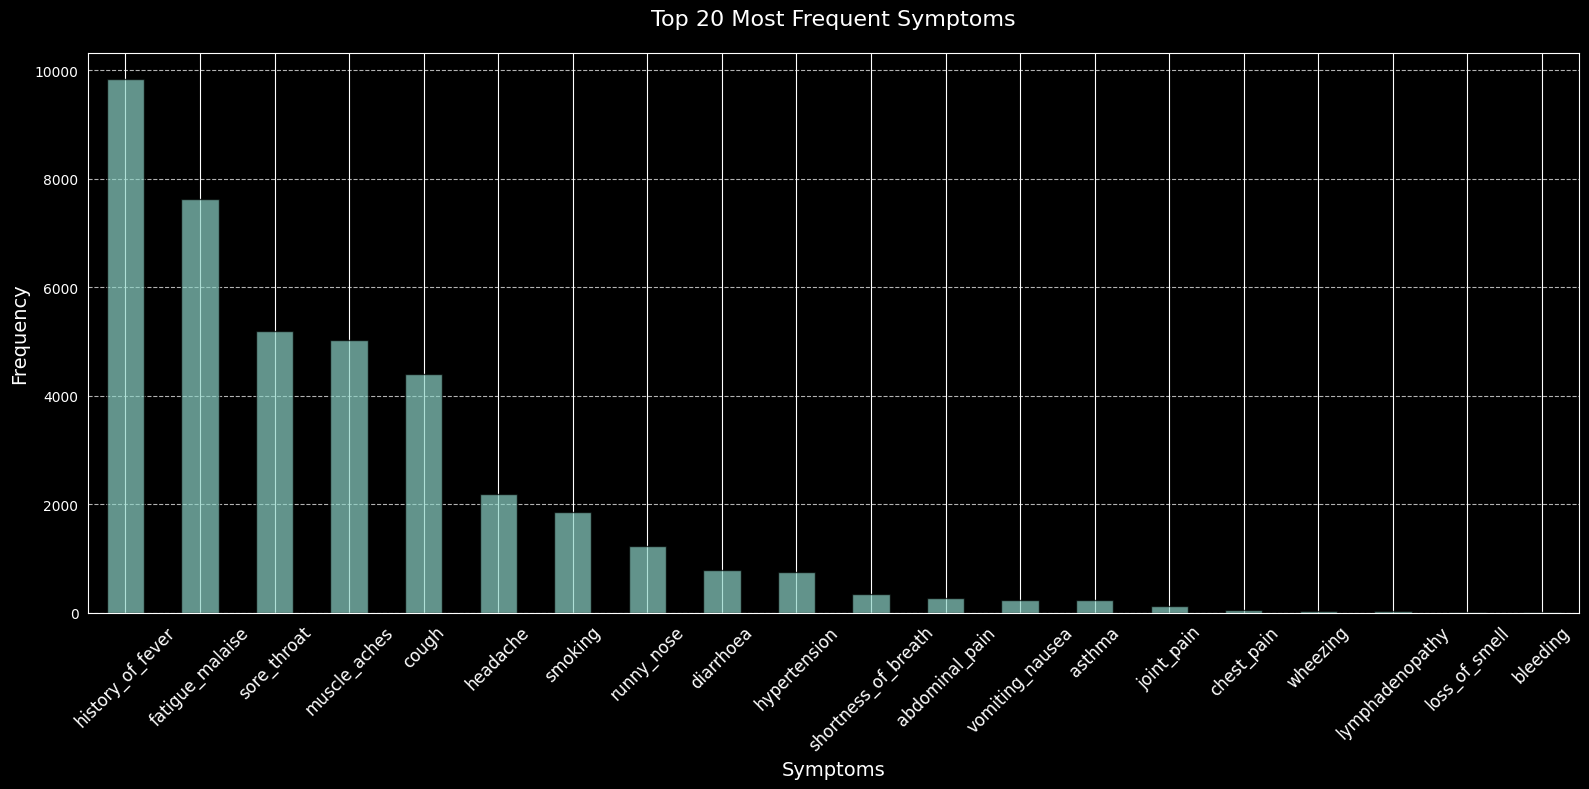

In [106]:
# Analyzing hospital 2
analyze_hospital_data(hospital2)

### Data Observations of hospital2

- many missing value in temperature (1222)

- in the gender distribution there is a third category, because of legend between the data

- column names needs to be standardized

- entire rows of data have NaN values

- Symptoms columns present nan values

## Comparing data between hospital1 and hospital2

## Standarizing/comparing data types and names

In [107]:
import io  # Import the io module to handle in-memory text streams

# Capture the .info() output of hospital1_copy
buffer1 = io.StringIO()  # Create a text buffer
hospital1.info(buf=buffer1)  # Write the .info() output to the buffer
info1 = buffer1.getvalue()  # Get the buffer content as a string

# Capture the .info() output of hospital2_copy
buffer2 = io.StringIO()  # Create another text buffer
hospital2.info(buf=buffer2)  # Write the .info() output to the buffer
info2 = buffer2.getvalue()  # Get the buffer content as a string

# Print the headers for both datasets
print("Hospital 1 Info:".ljust(50) + "Hospital 2 Info:")
print("-" * 50 + " " + "-" * 50)  # Add a dividing line

# Print the .info() output of both datasets side by side
# Match lines from both outputs
for line1, line2 in zip(info1.splitlines(), info2.splitlines()):
    print(line1.ljust(50) + line2)  # Align text to make it easier to read

# Remove any False Positives by standarizing to lower-case and replace spaces with "-"
hospital1.columns = hospital1.columns.str.strip().str.lower().str.replace(' ', '_')
hospital2.columns = hospital2.columns.str.strip().str.lower().str.replace(' ', '_')

unique_columns_h1 = hospital1.columns.difference(hospital2.columns)
unique_columns_h2 = hospital2.columns.difference(hospital1.columns)
common_columns_names = hospital1.columns.intersection(hospital2.columns)

print("\nHospital 1 has {} different column names: {}".format(
    len(unique_columns_h1), unique_columns_h1.to_list()))
print("Hospital 2 has {} different column names: {}".format(
    len(unique_columns_h2), unique_columns_h2.to_list()))

print("\nHospitals share {} columnn names".format(len(common_columns_names)))

common_columns_names_mismatch = []
# For each common column check D-Types
for col in common_columns_names:
    h1D = hospital1[col].dtype
    h2D = hospital2[col].dtype
    if h1D != h2D:
        common_columns_names_mismatch.append(col)
        print("Column name {} is different type in hospital 1 ({}) and hospital 2 ({})".format(
            col, h1D, h2D))

Hospital 1 Info:                                  Hospital 2 Info:
-------------------------------------------------- --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>             <class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711             RangeIndex: 12737 entries, 0 to 12736
Data columns (total 54 columns):                  Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype          #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         ---  ------                           --------------  -----         
 0   patient ID                       14712 non-null  int64          0   patient_id                       12734 non-null  float64       
 1   patient ID.1                     14712 non-null  int64          1   admission_id                     12734 non-null  float64       
 2   nationality        

### Analisis

Symptoms cells appear to only have 1,0 or Nan. In order to standarize it we need to convert the values from float64 to int64 since they are discrete values and remove NaN

# Data preparation

## Standardization

In [108]:
# Create a copy of hospital1 and hospital2 dataset to avoid modifying the original
hospital1_copy = hospital1.copy()
hospital2_copy = hospital2.copy()

In [109]:
# Making the column names similar after inspection
# basvurutarihi means admission date in turkish
hospital1_copy.rename(
    columns={'basvurutarihi': 'admission_date'}, inplace=True)
hospital1_copy.rename(columns={'patient_id.1': 'admission_id'}, inplace=True)
hospital1_copy.rename(columns={'gender_k=female_e=male': 'sex'}, inplace=True)
hospital2_copy.rename(
    columns={'country_of_residence': 'nationality'}, inplace=True)

# Dropping data, where the nationalities are NaN because country plays a big role on population density.
# Filling the values doesn't seem right since each population has it's own traits
hospital1_copy = hospital1_copy[~hospital1_copy['nationality'].isnull()]
hospital2_copy = hospital2_copy[~hospital2_copy['nationality'].isnull()]

In [110]:
# Modifying the patient_id to integer in hospital2_copy
hospital2_copy['patient_id'] = hospital2_copy['patient_id'].astype(int)

# Check the updated column
print(hospital2_copy['patient_id'].head())

1    88567155
2    36069621
3    57644199
4    81365404
5    82027164
Name: patient_id, dtype: int64
1    88567155
2    36069621
3    57644199
4    81365404
5    82027164
Name: patient_id, dtype: int64


In [111]:
hospital1_copy.head()

patient_id  admission_id nationality  age sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47   K             2022-01-01   
1     4373630       4373630        T.C.   23   K             2022-01-01   
2    12172023      12172023        T.C.   26   K             2022-01-01   
3    72856168      72856168        T.C.   60   K             2022-01-01   
4    72200559      72200559        T.C.   72   K             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                          0.0       0.0                       0.0   
1                          0.0       0.0                       0.0   
2                          0.0       0.0                       0.0   
3                          0.0       0.0                       0.0   
4                          0.0       0.0                       0.0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                       0.0                     0.0       0.0             0   
1                       0.0                     0.0       0.0             0   
2                       0.0                     0.0       0.0             0   
3                       0.0                     0.0       0.0             0   
4                       0.0                     0.0       0.0             0   

   smoking  other_risks  pcr_result  
0        0            0    positive  
1        0            0    positive  
2        0            0    positive  
3        0            0    positive  
4        0            0    positive  

[5 rows x 54 columns]

patient_id  admission_id nationality  age sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47   K             2022-01-01   
1     4373630       4373630        T.C.   23   K             2022-01-01   
2    12172023      12172023        T.C.   26   K             2022-01-01   
3    72856168      72856168        T.C.   60   K             2022-01-01   
4    72200559      72200559        T.C.   72   K             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                          0.0       0.0                       0.0   
1                          0.0       0.0                       0.0   
2                          0.0       0.0                       0.0   
3                          0.0       0.0                       0.0   
4                          0.0       0.0                       0.0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                       0.0                     0.0       0.0             0   
1                       0.0                     0.0       0.0             0   
2                       0.0                     0.0       0.0             0   
3                       0.0                     0.0       0.0             0   
4                       0.0                     0.0       0.0             0   

   smoking  other_risks  pcr_result  
0        0            0    positive  
1        0            0    positive  
2        0            0    positive  
3        0            0    positive  
4        0            0    positive  

[5 rows x 54 columns]

In [112]:
hospital2_copy.head()

patient_id  admission_id nationality   age              sex  \
1    88567155          45.0        T.C.  52.0  E=male K=female   
2    36069621         181.0        T.C.  47.0                K   
3    57644199          36.0        T.C.  36.0                K   
4    81365404          32.0        T.C.  30.0                E   
5    82027164          81.0        T.C.  41.0                K   

  date_of_first_symptoms      admission_date  fever_temperature  \
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   
5    2021-03-01 09:50:00 2021-03-01 09:50:00               36.9   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   
5               89.0               0.0  ...                            0   

   aids_hiv  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   
5         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   
5                       0         0             0        0            0   

   pcr_result  
1    positive  
2    positive  
3    positive  
4    positive  
5    positive  

[5 rows x 54 columns]

patient_id  admission_id nationality   age              sex  \
1    88567155          45.0        T.C.  52.0  E=male K=female   
2    36069621         181.0        T.C.  47.0                K   
3    57644199          36.0        T.C.  36.0                K   
4    81365404          32.0        T.C.  30.0                E   
5    82027164          81.0        T.C.  41.0                K   

  date_of_first_symptoms      admission_date  fever_temperature  \
1    2021-03-01 00:00:00 2021-03-01 00:00:00               37.3   
2    2021-03-01 08:38:00 2021-03-01 08:38:00               38.0   
3    2021-03-01 08:39:00 2021-03-01 08:39:00               37.5   
4    2021-03-01 09:25:00 2021-03-01 09:25:00               37.8   
5    2021-03-01 09:50:00 2021-03-01 09:50:00               36.9   

   oxygen_saturation  history_of_fever  ...  chronic_hematologic_disease  \
1               -1.0               0.0  ...                            0   
2               95.0               1.0  ...                            0   
3               88.0               0.0  ...                            0   
4               87.0               1.0  ...                            0   
5               89.0               0.0  ...                            0   

   aids_hiv  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
1         0                         0                         0   
2         0                         0                         0   
3         0                         0                         0   
4         0                         0                         0   
5         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   
5                       0         0             0        0            0   

   pcr_result  
1    positive  
2    positive  
3    positive  
4    positive  
5    positive  

[5 rows x 54 columns]

## Hospital1


### Checking missing values in hospital1

In [113]:
# Check for missing values in each column
missing_values = hospital1_copy.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with their missing value counts
print(columns_with_missing)

fever_temperature                 468
oxygen_saturation                   4
chronic_kidney_disease              7
obesity                            22
liver_disease                       6
asplenia                           22
chronic_neurological_disorder       2
chronic_hematologic_disease         2
aids_hiv                            2
diabetes_mellitus_type_1            3
diabetes_mellitus_type_2            2
rheumatologic_disorder              2
dementia                            2
pcr_result                       1176
dtype: int64
fever_temperature                 468
oxygen_saturation                   4
chronic_kidney_disease              7
obesity                            22
liver_disease                       6
asplenia                           22
chronic_neurological_disorder       2
chronic_hematologic_disease         2
aids_hiv                            2
diabetes_mellitus_type_1            3
diabetes_mellitus_type_2            2
rheumatologic_disorder              2

### Filling the missing data where it is necessary

#### Mean

We want to make sure to fill continous values with the mean. However we need to make sure to remove outliers if necessary

##### Temperature

In [114]:
sorted_temp_hs1 = np.sort(hospital1_copy['fever_temperature'].dropna())
unique_temp_hs1 = np.unique(sorted_temp_hs1, return_counts=True)

print("Unique temperature values: {}\n".format(len(unique_temp_hs1[0])))

unique_df_hs1 = pd.DataFrame(
    {"Temperatures": unique_temp_hs1[0], "Frequency": unique_temp_hs1[1]})

# Pretty print
unique_df_hs1.transpose()

Unique temperature values: 55



0     1     2     3     4     5     6     7     8     9   ...  \
Temperatures  35.0  35.4  35.5  35.7  35.8  35.9  36.0  36.1  36.1  36.2  ...   
Frequency      2.0   1.0   1.0   1.0   8.0  11.0  20.0  24.0  13.0  42.0  ...   

                45     46     47     48    49    50    51    52    53    54  
Temperatures  38.9   39.0   39.1   39.2  39.3  39.4  39.4  39.5  39.6  39.8  
Frequency      5.0  330.0  269.0  169.0  55.0  12.0   6.0   2.0   2.0   1.0  

[2 rows x 55 columns]

Unique temperature values: 55



0     1     2     3     4     5     6     7     8     9   ...  \
Temperatures  35.0  35.4  35.5  35.7  35.8  35.9  36.0  36.1  36.1  36.2  ...   
Frequency      2.0   1.0   1.0   1.0   8.0  11.0  20.0  24.0  13.0  42.0  ...   

                45     46     47     48    49    50    51    52    53    54  
Temperatures  38.9   39.0   39.1   39.2  39.3  39.4  39.4  39.5  39.6  39.8  
Frequency      5.0  330.0  269.0  169.0  55.0  12.0   6.0   2.0   2.0   1.0  

[2 rows x 55 columns]

###### Analysis
Temperatures such as **35-35.5** / **39.5 - 39.8** are not realistic, in order to fill NaN values we need to calculate if a reduce mean is necessary

```python
# Calculate the percentage to remove the first/last 3 values of temperature
(3*56)/100 = 1.68%
```

In [115]:
# Trimmed mean needs to be sorted
print("Trimmed mean: {}".format(scstat.trim_mean(
    sorted_temp_hs1, proportiontocut=0.0168)))
print("Standard mean: {}".format(sorted_temp_hs1.mean()))

Trimmed mean: 37.33088043004504
Standard mean: 37.34355518112889
Trimmed mean: 37.33088043004504
Standard mean: 37.34355518112889


Significance is negligible < 0.01 °C. No need apply a trimmed mean

##### Oxygen Saturation

In [116]:
sorted_oxygen_saturation_hs1 = np.sort(
    hospital1_copy['oxygen_saturation'].dropna())
sorted_oxygen_saturation_hs1 = np.unique(
    sorted_oxygen_saturation_hs1, return_counts=True)

print("Unique oxygen saturation values: {}\n".format(
    len(sorted_oxygen_saturation_hs1[0])))

unique_oxy_df_hs1 = pd.DataFrame(
    {"Oxygen Saturation": sorted_oxygen_saturation_hs1[0], "Frequency": sorted_oxygen_saturation_hs1[1]})

# Pretty print
unique_oxy_df_hs1.transpose()

Unique oxygen saturation values: 30



0     1     2     3     4     5     6     7      8   \
Oxygen Saturation  -1.0   0.0  69.0  70.0  71.0  76.0  77.0  78.0   79.0   
Frequency          16.0  62.0   8.0  12.0   4.0   3.0  18.0  45.0  121.0   

                      9   ...     20     21     22     23      24      25  \
Oxygen Saturation   80.0  ...   91.0   92.0   93.0   94.0    95.0    96.0   
Frequency          155.0  ...  204.0  156.0  120.0  901.0  3256.0  3624.0   

                       26      27     28     29  
Oxygen Saturation    97.0    98.0   99.0  100.0  
Frequency          1833.0  1221.0  522.0   55.0  

[2 rows x 30 columns]

Unique oxygen saturation values: 30



0     1     2     3     4     5     6     7      8   \
Oxygen Saturation  -1.0   0.0  69.0  70.0  71.0  76.0  77.0  78.0   79.0   
Frequency          16.0  62.0   8.0  12.0   4.0   3.0  18.0  45.0  121.0   

                      9   ...     20     21     22     23      24      25  \
Oxygen Saturation   80.0  ...   91.0   92.0   93.0   94.0    95.0    96.0   
Frequency          155.0  ...  204.0  156.0  120.0  901.0  3256.0  3624.0   

                       26      27     28     29  
Oxygen Saturation    97.0    98.0   99.0  100.0  
Frequency          1833.0  1221.0  522.0   55.0  

[2 rows x 30 columns]

In [117]:
# Drop first two values (Oxigenation -1 or 0 means patient is dead)
print("Standard mean: {}".format(
    unique_oxy_df_hs1.iloc[2::]["Oxygen Saturation"].mean()))

Standard mean: 86.07142857142857
Standard mean: 86.07142857142857


In [118]:
# Filling data with mean in fever_temperature

if 'fever_temperature' in hospital1_copy.columns:

    # Calculate the mean of the column, ignoring NaN values with reduced mean to avoid extreme outliers
    mean_value = sorted_temp_hs1.mean()

    # Fill missing values with the mean
    hospital1_copy['fever_temperature'] = hospital1_copy['fever_temperature'].fillna(
        mean_value)

    # Verify the result
    print(
        f"Missing values for fever_temperature after filling: {hospital1_copy['fever_temperature'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")


# Filling data with mean in oxygen saturation
if 'oxygen_saturation' in hospital1_copy.columns:

    # Calculate the mean of the column, ignoring NaN values with reduced mean to avoid extreme outliers
    mean_value = unique_oxy_df_hs1.iloc[2::]["Oxygen Saturation"].mean()

    # Replace invalids with None
    hospital1_copy.loc[:, 'oxygen_saturation'] = hospital1_copy['oxygen_saturation'].replace(
        {-1: None, 0: None})

    # Fill missing values with the mean
    hospital1_copy['oxygen_saturation'] = hospital1_copy['oxygen_saturation'].fillna(
        mean_value)

    # Verify the result
    print(
        f"\nMissing values for oxygen_saturation after filling: {hospital1_copy['oxygen_saturation'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")

Missing values for fever_temperature after filling: 0
Filled missing values with the mean: 37.34355518112889

Missing values for oxygen_saturation after filling: 0
Filled missing values with the mean: 86.07142857142857


/tmp/ipykernel_76467/10638866.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[96.0 96.0 95.0 ... 95.0 96.0 99.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hospital1_copy.loc[:, 'oxygen_saturation'] = hospital1_copy['oxygen_saturation'].replace(
/tmp/ipykernel_76467/10638866.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital1_copy['oxygen_saturation'] = hospital1_copy['oxygen_saturation'].fillna(


Missing values for fever_temperature after filling: 0
Filled missing values with the mean: 37.34355518112889

Missing values for oxygen_saturation after filling: 0
Filled missing values with the mean: 86.07142857142857


/tmp/ipykernel_76467/10638866.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[96.0 96.0 95.0 ... 95.0 96.0 99.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hospital1_copy.loc[:, 'oxygen_saturation'] = hospital1_copy['oxygen_saturation'].replace(
/tmp/ipykernel_76467/10638866.py:29: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital1_copy['oxygen_saturation'] = hospital1_copy['oxygen_saturation'].fillna(


#### Mode

In [119]:
# Filling data with mode where it is necessary, since data is discrete we can compute mean, rather the most frequent value (mode)

# List of columns to fill with the mode
columns_to_fill_mode = [
    'chronic_kidney_disease', 'obesity', 'liver_disease',
    'asplenia', 'chronic_neurological_disorder', 'chronic_hematologic_disease',
    'aids_hiv', 'diabetes_mellitus_type_1', 'diabetes_mellitus_type_2',
    'rheumatologic_disorder', 'dementia'
]

# Fill missing values with the mode for each column in the list
for col in columns_to_fill_mode:
    if col in hospital1_copy.columns:
        most_used = hospital1_copy[col].dropna().mode()
        hospital1_copy[col] = hospital1_copy[col].fillna(most_used[0])

# Verify the result
# Should show 0 for all columns
print(hospital1_copy[columns_to_fill_mode].isnull().sum())

chronic_kidney_disease           0
obesity                          0
liver_disease                    0
asplenia                         0
chronic_neurological_disorder    0
chronic_hematologic_disease      0
aids_hiv                         0
diabetes_mellitus_type_1         0
diabetes_mellitus_type_2         0
rheumatologic_disorder           0
dementia                         0
dtype: int64
chronic_kidney_disease           0
obesity                          0
liver_disease                    0
asplenia                         0
chronic_neurological_disorder    0
chronic_hematologic_disease      0
aids_hiv                         0
diabetes_mellitus_type_1         0
diabetes_mellitus_type_2         0
rheumatologic_disorder           0
dementia                         0
dtype: int64


#### Handling the PCR result column

In [120]:
# Replace 'positive' with 1 and 'negative' with 0
hospital1_copy.loc[:, 'pcr_result'] = hospital1_copy['pcr_result'].replace(
    {'positive': 1, 'negative': 0})

# Drop missing values
hospital1_copy = hospital1_copy.dropna(subset=["pcr_result"])

# Convert the column to integers
hospital1_copy.loc[:, 'pcr_result'] = hospital1_copy['pcr_result'].astype(int)

# Verify the changes
print(hospital1_copy['pcr_result'].value_counts())

pcr_result
1    12434
0     1102
Name: count, dtype: int64


/tmp/ipykernel_76467/3638044278.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital1_copy.loc[:, 'pcr_result'] = hospital1_copy['pcr_result'].replace(


pcr_result
1    12434
0     1102
Name: count, dtype: int64


/tmp/ipykernel_76467/3638044278.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital1_copy.loc[:, 'pcr_result'] = hospital1_copy['pcr_result'].replace(


#### Replacing gender data

In [121]:
# Converting data in the "sex" column to make it more understandable
# M = Man , F = Female
hospital1_copy.loc[:, 'sex'] = hospital1_copy['sex'].replace(
    {'E': '1', 'K': '0'})

# Verify the changes
print(hospital1_copy['sex'].value_counts())  # Count occurrences of each value

sex
0    7626
1    5910
Name: count, dtype: int64
sex
0    7626
1    5910
Name: count, dtype: int64


## Hospital2

### Checking missing values in hospital2

In [122]:
# Check for missing values in each column
missing_values = hospital2_copy.isnull().sum()

# Filter columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with their missing value counts
print(columns_with_missing)

fever_temperature    1219
oxygen_saturation       4
history_of_fever        5
bleeding               36
other_symptoms         36
pcr_result             33
dtype: int64
fever_temperature    1219
oxygen_saturation       4
history_of_fever        5
bleeding               36
other_symptoms         36
pcr_result             33
dtype: int64


###Filling the missing data where it is necessary

#### Mean

We want to make sure to fill continous values with the mean. However we need to make sure to remove outliers if necessary

##### Temperature

In [123]:
sorted_temp_h2 = np.sort(hospital2_copy['fever_temperature'].dropna())
unique_temp_h2 = np.unique(sorted_temp_h2, return_counts=True)

print("Unique temperature values: {}\n".format(len(unique_temp_h2[0])))

unique_temp_h2 = pd.DataFrame(
    {"Temperatures": unique_temp_h2[0], "Frequency": unique_temp_h2[1]})

# Pretty print
unique_temp_h2.transpose()

Unique temperature values: 62



0     1     2     3     4     5     6     7     8     9   ...  \
Temperatures  34.8  34.9  35.0  35.1  35.2  35.4  35.5  35.6  35.7  35.8  ...   
Frequency      1.0   1.0   2.0   1.0   1.0   1.0   2.0   3.0   2.0  19.0  ...   

                52     53     54     55    56    57    58    59    60    61  
Temperatures  38.9   39.0   39.1   39.2  39.3  39.4  39.4  39.5  39.6  40.1  
Frequency      7.0  225.0  193.0  136.0  57.0   3.0   4.0   1.0   4.0   1.0  

[2 rows x 62 columns]

Unique temperature values: 62



0     1     2     3     4     5     6     7     8     9   ...  \
Temperatures  34.8  34.9  35.0  35.1  35.2  35.4  35.5  35.6  35.7  35.8  ...   
Frequency      1.0   1.0   2.0   1.0   1.0   1.0   2.0   3.0   2.0  19.0  ...   

                52     53     54     55    56    57    58    59    60    61  
Temperatures  38.9   39.0   39.1   39.2  39.3  39.4  39.4  39.5  39.6  40.1  
Frequency      7.0  225.0  193.0  136.0  57.0   3.0   4.0   1.0   4.0   1.0  

[2 rows x 62 columns]

##### Analysis
Temperatures such as **34.8-35.5** / **39.5 - 40.1** are not realistic, in order to fill NaN values we need to calculate if a reduce mean is necessary

```python
# Calculate the percentage to remove the first 7 values of temperature
(7*62)/100 = 4.34%

# Calculate the percentage to remove the last 3 values of temperature
(3*62)/100 = 1.86%
```

In [124]:
# Trimmed mean needs to be sorted
print("Trimmed mean: {}".format(
    scstat.tmean(sorted_temp_h2, limits=[35.5, 39.5])))
print("Standard mean: {}".format(sorted_temp_h2.mean()))

Trimmed mean: 37.342049900026076
Standard mean: 37.341684759009986
Trimmed mean: 37.342049900026076
Standard mean: 37.341684759009986


Significance is negligible < 0.01 °C. No need apply a trimmed mean

##### Oxygen Saturation

In [125]:
sorted_oxygen_saturation_h2 = np.sort(
    hospital2_copy['oxygen_saturation'].dropna())
sorted_oxygen_saturation_h2 = np.unique(
    sorted_oxygen_saturation_h2, return_counts=True)

print("Unique oxygen saturation values: {}\n".format(
    len(sorted_oxygen_saturation_h2[0])))

unique_oxy_df_hs2 = pd.DataFrame(
    {"Oxygen Saturation": sorted_oxygen_saturation_h2[0], "Frequency": sorted_oxygen_saturation_h2[1]})

# Pretty print
unique_oxy_df_hs2.transpose()

Unique oxygen saturation values: 33



0     1     2     3     4     5     6     7     8     9   \
Oxygen Saturation  -1.0   0.0  26.0  68.0  69.0  70.0  71.0  73.0  76.0  77.0   
Frequency          16.0  49.0   1.0   1.0   3.0  11.0   6.0   1.0   2.0  22.0   

                   ...     23     24     25     26      27      28      29  \
Oxygen Saturation  ...   91.0   92.0   93.0   94.0    95.0    96.0    97.0   
Frequency          ...  201.0  123.0  118.0  829.0  2752.0  3121.0  1530.0   

                       30     31     32  
Oxygen Saturation    98.0   99.0  100.0  
Frequency          1036.0  418.0   58.0  

[2 rows x 33 columns]

Unique oxygen saturation values: 33



0     1     2     3     4     5     6     7     8     9   \
Oxygen Saturation  -1.0   0.0  26.0  68.0  69.0  70.0  71.0  73.0  76.0  77.0   
Frequency          16.0  49.0   1.0   1.0   3.0  11.0   6.0   1.0   2.0  22.0   

                   ...     23     24     25     26      27      28      29  \
Oxygen Saturation  ...   91.0   92.0   93.0   94.0    95.0    96.0    97.0   
Frequency          ...  201.0  123.0  118.0  829.0  2752.0  3121.0  1530.0   

                       30     31     32  
Oxygen Saturation    98.0   99.0  100.0  
Frequency          1036.0  418.0   58.0  

[2 rows x 33 columns]

In [126]:
# Drop first two values (Oxigenation -1 or 0 means patient is dead)
print("Standard mean: {}".format(
    unique_oxy_df_hs2.iloc[2::]["Oxygen Saturation"].mean()))

Standard mean: 83.12903225806451
Standard mean: 83.12903225806451


In [127]:
# Filling data with mean in fever_temperature

if 'fever_temperature' in hospital2_copy.columns:
    # Calculate the mean of the column, ignoring NaN values
    mean_value = sorted_temp_h2.mean()

    # Fill missing values with the mean
    hospital2_copy['fever_temperature'] = hospital2_copy['fever_temperature'].fillna(
        mean_value)

    # Verify the result
    print(
        f"Missing values after filling: {hospital2_copy['fever_temperature'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")


# Filling data with mean in fever_temperature
if 'oxygen_saturation' in hospital2_copy.columns:

    # Calculate the mean of the column, ignoring NaN values with reduced mean to avoid extreme outliers
    mean_value = unique_oxy_df_hs2.iloc[2::]["Oxygen Saturation"].mean()

    # Replace invalids with None
    hospital2_copy.loc[:, 'oxygen_saturation'] = hospital1_copy['oxygen_saturation'].replace(
        {-1: None, 0: None})

    # Fill missing values with the mean
    hospital2_copy['oxygen_saturation'] = hospital2_copy['oxygen_saturation'].fillna(
        mean_value)

    # Verify the result
    print(
        f"\nMissing values for oxygen_saturation after filling: {hospital2_copy['oxygen_saturation'].isnull().sum()}")
    print(f"Filled missing values with the mean: {mean_value}")

Missing values after filling: 0
Filled missing values with the mean: 37.341684759009986

Missing values for oxygen_saturation after filling: 0
Filled missing values with the mean: 83.12903225806451
Missing values after filling: 0
Filled missing values with the mean: 37.341684759009986

Missing values for oxygen_saturation after filling: 0
Filled missing values with the mean: 83.12903225806451


#### Mode

In [128]:
# Filling data with median where it is necessary

# List of columns to fill with the median
columns_to_fill_mode = [
    'history_of_fever', 'other_symptoms', 'bleeding', 'sex'
]

# Sex has a format mismatch column
hospital2_copy['sex'] = hospital2_copy['sex'].replace('E=male K=female', None)

# Fill missing values with the median for each column in the list
for col in columns_to_fill_mode:
    if col in hospital2_copy.columns:
        most_used = hospital2_copy[col].dropna().mode()
        hospital2_copy[col] = hospital2_copy[col].fillna(most_used[0])

# Verify the result
# Should show 0 for all columns
print(hospital2_copy[columns_to_fill_mode].isnull().sum())

history_of_fever    0
other_symptoms      0
bleeding            0
sex                 0
dtype: int64
history_of_fever    0
other_symptoms      0
bleeding            0
sex                 0
dtype: int64


#### Handling the PCR result column

In [129]:
# Replace 'positive' with 1 and 'negative' with 0
hospital2_copy.loc[:, 'pcr_result'] = hospital2_copy['pcr_result'].replace(
    {'positive': 1, 'negative': 0})

# Drop missing values
hospital2_copy = hospital2_copy.dropna(subset=["pcr_result"])

# Convert the column to integers
hospital2_copy.loc[:, 'pcr_result'] = hospital2_copy['pcr_result'].astype(int)

# Verify the changes
print(hospital2_copy['pcr_result'].value_counts())

pcr_result
1    9776
0    2925
Name: count, dtype: int64


/tmp/ipykernel_76467/869031165.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital2_copy.loc[:, 'pcr_result'] = hospital2_copy['pcr_result'].replace(


pcr_result
1    9776
0    2925
Name: count, dtype: int64


/tmp/ipykernel_76467/869031165.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospital2_copy.loc[:, 'pcr_result'] = hospital2_copy['pcr_result'].replace(


#### Replacing gender data

In [130]:
# Converting data in the "sex" column to make it more understandable
# M = Man , F = Female
hospital2_copy.loc[:, 'sex'] = hospital2_copy['sex'].replace(
    {'E': '1', 'K': '0'})

# Verify the changes
print(hospital2_copy['sex'].value_counts())  # Count occurrences of each value

sex
0    7650
1    5051
Name: count, dtype: int64
sex
0    7650
1    5051
Name: count, dtype: int64


## Converting the neccesary columns into integers





In [131]:
# Patiend_id to long just to make sure we do not hit the limit of integers

# List of columns to convert to integers
columns_to_convert = [
    'history_of_fever', 'cough', 'sore_throat', 'runny_nose',
    'wheezing', 'shortness_of_breath', 'lower_chest_wall_indrawing', 'chest_pain',
    'conjunctivitis', 'lymphadenopathy', 'headache', 'loss_of_smell', 'loss_of_taste',
    'fatigue_malaise', 'anorexia', 'altered_consciousness_confusion', 'muscle_aches',
    'joint_pain', 'inability_to_walk', 'abdominal_pain', 'diarrhoea', 'vomiting_nausea',
    'skin_rash', 'bleeding', 'other_symptoms', 'chronic_cardiac_disease', 'hypertension',
    'chronic_pulmonary_disease', 'asthma', 'chronic_kidney_disease', 'obesity',
    'liver_disease', 'asplenia', 'chronic_neurological_disorder', 'malignant_neoplasm',
    'chronic_hematologic_disease', 'AIDS_HIV', 'diabetes_mellitus_type_1',
    'diabetes_mellitus_type_2', 'rheumatologic_disorder', 'dementia', 'tuberculosis',
    'smoking', 'other_risks', 'age', 'admission_id', 'aids_hiv', 'sex', 'pcr_result'
]

# Dictionary to store the count of replaced missing values
missing_value_counts = {}

# For hospital1_copy
for col in columns_to_convert:
    if col in hospital1_copy.columns:  # Check if the column exists in the DataFrame
        # Count missing values before filling
        missing_count = hospital1_copy[col].isnull().sum()

        # Store the count in the dictionary
        missing_value_counts[f"hospital1_copy_{col}"] = missing_count

        # Convert to int
        hospital1_copy[col] = hospital1_copy[col].astype('int64')

# For hospital2_copy
for col in columns_to_convert:
    if col in hospital2_copy.columns:  # Check if the column exists in the DataFrame
        # Count missing values before filling
        missing_count = hospital2_copy[col].isnull().sum()

        # Store the count in the dictionary
        missing_value_counts[f"hospital2_copy_{col}"] = missing_count

        # Convert to int
        hospital2_copy[col] = hospital2_copy[col].astype('int64')

# Print the count of replaced missing values larger than 0
for column, count in missing_value_counts.items():
    if count > 0:
        print(f"Column {column}: Replaced {count} missing values")

# If no prints, that means there's no missing data in the two datasets

In [132]:
# Checking if all of the data types are matching

# Capture the .info() output of hospital1_copy
buffer1 = io.StringIO()  # Create a text buffer
hospital1_copy.info(buf=buffer1)  # Write the .info() output to the buffer
info1 = buffer1.getvalue()  # Get the buffer content as a string

# Capture the .info() output of hospital2_copy
buffer2 = io.StringIO()  # Create another text buffer
hospital2_copy.info(buf=buffer2)  # Write the .info() output to the buffer
info2 = buffer2.getvalue()  # Get the buffer content as a string

# Print the headers for both datasets
print("Hospital 1 Info:".ljust(50) + "Hospital 2 Info:")
print("-" * 50 + " " + "-" * 50)  # Add a dividing line

# Print the .info() output of both datasets side by side
# Match lines from both outputs
for line1, line2 in zip(info1.splitlines(), info2.splitlines()):
    print(line1.ljust(50) + line2)  # Align text to make it easier to read

unique_columns_h1 = hospital1_copy.columns.difference(hospital2_copy.columns)
unique_columns_h2 = hospital2_copy.columns.difference(hospital1_copy.columns)
common_columns_names = hospital1_copy.columns.intersection(
    hospital2_copy.columns)

print("\nHospital 1 has {} different column names: {}".format(
    len(unique_columns_h1), unique_columns_h1.to_list()))
print("Hospital 2 has {} different column names: {}".format(
    len(unique_columns_h2), unique_columns_h2.to_list()))

print("\nHospitals share {} columnn names".format(len(common_columns_names)))

common_columns_names_mismatch = []
# For each common column check D-Types
for col in common_columns_names:
    h1D = hospital1_copy[col].dtype
    h2D = hospital2_copy[col].dtype
    if h1D != h2D:
        common_columns_names_mismatch.append(col)
        print("Column name {} is different type in hospital 1 ({}) and hospital 2 ({})".format(
            col, h1D, h2D))

Hospital 1 Info:                                  Hospital 2 Info:
-------------------------------------------------- --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>             <class 'pandas.core.frame.DataFrame'>
Index: 13536 entries, 0 to 14711                  Index: 12701 entries, 1 to 12734
Data columns (total 54 columns):                  Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype          #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         ---  ------                           --------------  -----         
 0   patient_id                       13536 non-null  int64          0   patient_id                       12701 non-null  int64         
 1   admission_id                     13536 non-null  int64          1   admission_id                     12701 non-null  int64         
 2   nationality             

In [133]:
print("Total hospital 1 rows {}".format(hospital1_copy.shape))

hospital1_copy.head()  # checking the data once again

Total hospital 1 rows (13536, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0             2022-01-01   
1     4373630       4373630        T.C.   23    0             2022-01-01   
2    12172023      12172023        T.C.   26    0             2022-01-01   
3    72856168      72856168        T.C.   60    0             2022-01-01   
4    72200559      72200559        T.C.   72    0             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                            0         0                         0   
1                            0         0                         0   
2                            0         0                         0   
3                            0         0                         0   
4                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                         0                       0         0             0   
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   

   smoking  other_risks  pcr_result  
0        0            0           1  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  

[5 rows x 54 columns]

Total hospital 1 rows (13536, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0             2022-01-01   
1     4373630       4373630        T.C.   23    0             2022-01-01   
2    12172023      12172023        T.C.   26    0             2022-01-01   
3    72856168      72856168        T.C.   60    0             2022-01-01   
4    72200559      72200559        T.C.   72    0             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                            0         0                         0   
1                            0         0                         0   
2                            0         0                         0   
3                            0         0                         0   
4                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                         0                       0         0             0   
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   

   smoking  other_risks  pcr_result  
0        0            0           1  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  

[5 rows x 54 columns]

In [134]:
print("Total hospital 1 rows {}".format(hospital2_copy.shape))

hospital2_copy.head()  # checking the data once again

Total hospital 1 rows (12701, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
1    88567155            45        T.C.   52    0    2021-03-01 00:00:00   
2    36069621           181        T.C.   47    0    2021-03-01 08:38:00   
3    57644199            36        T.C.   36    0    2021-03-01 08:39:00   
4    81365404            32        T.C.   30    1    2021-03-01 09:25:00   
5    82027164            81        T.C.   41    0    2021-03-01 09:50:00   

       admission_date  fever_temperature  oxygen_saturation  history_of_fever  \
1 2021-03-01 00:00:00               37.3               96.0                 0   
2 2021-03-01 08:38:00               38.0               95.0                 1   
3 2021-03-01 08:39:00               37.5               95.0                 0   
4 2021-03-01 09:25:00               37.8               96.0                 1   
5 2021-03-01 09:50:00               36.9               95.0                 0   

   ...  chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
1  ...                            0         0                         0   
2  ...                            0         0                         0   
3  ...                            0         0                         0   
4  ...                            0         0                         0   
5  ...                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   
5                         0                       0         0             0   

   smoking  other_risks  pcr_result  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  
5        0            0           1  

[5 rows x 54 columns]

Total hospital 1 rows (12701, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
1    88567155            45        T.C.   52    0    2021-03-01 00:00:00   
2    36069621           181        T.C.   47    0    2021-03-01 08:38:00   
3    57644199            36        T.C.   36    0    2021-03-01 08:39:00   
4    81365404            32        T.C.   30    1    2021-03-01 09:25:00   
5    82027164            81        T.C.   41    0    2021-03-01 09:50:00   

       admission_date  fever_temperature  oxygen_saturation  history_of_fever  \
1 2021-03-01 00:00:00               37.3               96.0                 0   
2 2021-03-01 08:38:00               38.0               95.0                 1   
3 2021-03-01 08:39:00               37.5               95.0                 0   
4 2021-03-01 09:25:00               37.8               96.0                 1   
5 2021-03-01 09:50:00               36.9               95.0                 0   

   ...  chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
1  ...                            0         0                         0   
2  ...                            0         0                         0   
3  ...                            0         0                         0   
4  ...                            0         0                         0   
5  ...                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   
5                         0                       0         0             0   

   smoking  other_risks  pcr_result  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  
5        0            0           1  

[5 rows x 54 columns]

## Merging the two datasets into one for easier model developing

In [135]:
# Concatenate hospital1_copy and hospital2_copy row-wise
merged_hospitals = pd.concat(
    [hospital1_copy, hospital2_copy], axis=0, ignore_index=True)

# Verify the result
print("Shape of merged dataset:", merged_hospitals.shape)
merged_hospitals.head()

Shape of merged dataset: (26237, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0             2022-01-01   
1     4373630       4373630        T.C.   23    0             2022-01-01   
2    12172023      12172023        T.C.   26    0             2022-01-01   
3    72856168      72856168        T.C.   60    0             2022-01-01   
4    72200559      72200559        T.C.   72    0             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                            0         0                         0   
1                            0         0                         0   
2                            0         0                         0   
3                            0         0                         0   
4                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                         0                       0         0             0   
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   

   smoking  other_risks  pcr_result  
0        0            0           1  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  

[5 rows x 54 columns]

Shape of merged dataset: (26237, 54)


patient_id  admission_id nationality  age  sex date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0             2022-01-01   
1     4373630       4373630        T.C.   23    0             2022-01-01   
2    12172023      12172023        T.C.   26    0             2022-01-01   
3    72856168      72856168        T.C.   60    0             2022-01-01   
4    72200559      72200559        T.C.   72    0             2021-12-22   

  admission_date  fever_temperature  oxygen_saturation  history_of_fever  ...  \
0     2022-01-01               38.2               96.0                 0  ...   
1     2022-01-01               37.0               96.0                 1  ...   
2     2022-01-01               38.0               95.0                 1  ...   
3     2022-01-01               36.5               95.0                 0  ...   
4     2021-12-22               36.9               96.0                 0  ...   

   chronic_hematologic_disease  aids_hiv  diabetes_mellitus_type_1  \
0                            0         0                         0   
1                            0         0                         0   
2                            0         0                         0   
3                            0         0                         0   
4                            0         0                         0   

   diabetes_mellitus_type_2  rheumatologic_disorder  dementia  tuberculosis  \
0                         0                       0         0             0   
1                         0                       0         0             0   
2                         0                       0         0             0   
3                         0                       0         0             0   
4                         0                       0         0             0   

   smoking  other_risks  pcr_result  
0        0            0           1  
1        0            0           1  
2        0            0           1  
3        0            0           1  
4        0            0           1  

[5 rows x 54 columns]

## Object columns cleanup

### Country Names

In [136]:
# Important fields like Nationality needs to be cleanup and encoded

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Print all nationalities
print_all_df(merged_hospitals["nationality"].value_counts())

nationality
T.C.                                                 24911
Azerbaijan                                             206
Uzbekistan                                              75
Turkmenistan                                            69
United Kingdom (Great Britain)                          65
Ireland                                                 54
USA                                                     44
Germany                                                 42
France                                                  40
Russia                                                  38
Kyrgyzstan                                              38
Iraq                                                    25
Kazakhstan                                              24
Iran (Islamic Republic of Iran)                         23
Netherlands                                             22
Ethiopia                                                20
Georgia                                     

In [137]:
def standardize_country_name(country):
    # Handle common variations and special cases manually
    custom_mappings = {
        "t.c.": "792",  # Numeric code for Turkey,
        "kuzey kibris tãœrk cum.": "792",  # Turkey again
        "diäÿer": "792",  # Turkish word
        "united kingdom (great britain)": "826",
        "usa": "840",  # Numeric code for United States
        "iran (islamic republic of iran)": "364",
        "cyprus": "196",
        "kuzėy kibris türk cum.": "196",  # North Cyprus, map to Cyprus
        "rã‰union": "638",  # Reunion
        "the turkish republic of northern cyprus": "196",
        "jordan (hashemite kingdom of jordan)": "400",
        "kosova cumhuriyeti": "412",  # Kosovo
        "spain (espaã±a)": "724",
        "bosnia and herzegovä±na": "070",
        "libya (libyan arab jamahirya)": "434",
        "macedonia (former yugoslav republic of macedonia)": "807",
        "democratic republic of the congo": "180",
        # Côte d'Ivoire - Costa de Marfil
        "cã”te divoire (ivory coast)": "384",
        "palestinian territories": "274",  # Franja de Gaza (Palestina)
        "chad (tchad)": "148",
        "slovakia (slovak republic)": "703",
        "saudi arabia (kingdom of saudi arabia)": "682",
    }

    # Check custom mappings first
    if country in custom_mappings:
        return custom_mappings[country]

    # Attempt to find the country using pycountry
    try:
        country = pycountry.countries.get(name=country) or \
            pycountry.countries.search_fuzzy(country)[0]
        return country.numeric  # Return the numeric ISO code
    except (LookupError, AttributeError):
        return country  # Return None if the country is not found


# Normalize name (strip whitespace and convert to lowercase for matching)
merged_hospitals["nationality_numeric"] = merged_hospitals["nationality"].map(
    lambda x: standardize_country_name(x.strip().lower()))

# Convert the DataFrame to numeric, coercing errors to NaN
merged_hospitals["nationality_numeric"] = merged_hospitals["nationality_numeric"].apply(
    pd.to_numeric, errors="coerce")

# Identify non-numeric values (where conversion resulted in NaN)
nan_rows = merged_hospitals[merged_hospitals["nationality_numeric"].isna()]

# Print nationalities will failed conversion
print_all_df(nan_rows[["nationality", "nationality_numeric"]])

Empty DataFrame
Columns: [nationality, nationality_numeric]
Index: []
Empty DataFrame
Columns: [nationality, nationality_numeric]
Index: []


### Dates

In [138]:
# List date columns
dates_columns = [
    "date_of_first_symptoms",
    "admission_date"
]

# Convert date portion (regardless of time) to ordinal value
for column in dates_columns:
    merged_hospitals[column] = merged_hospitals[column].apply(
        lambda x: x.date().toordinal())

# Check results
merged_hospitals[dates_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   date_of_first_symptoms  26237 non-null  int64
 1   admission_date          26237 non-null  int64
dtypes: int64(2)
memory usage: 410.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   date_of_first_symptoms  26237 non-null  int64
 1   admission_date          26237 non-null  int64
dtypes: int64(2)
memory usage: 410.1 KB


In [139]:
# Last check

merged_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       26237 non-null  int64  
 1   admission_id                     26237 non-null  int64  
 2   nationality                      26237 non-null  object 
 3   age                              26237 non-null  int64  
 4   sex                              26237 non-null  int64  
 5   date_of_first_symptoms           26237 non-null  int64  
 6   admission_date                   26237 non-null  int64  
 7   fever_temperature                26237 non-null  float64
 8   oxygen_saturation                26237 non-null  float64
 9   history_of_fever                 26237 non-null  int64  
 10  cough                            26237 non-null  int64  
 11  sore_throat                      26237 non-null  int64  
 12  runny_nose        

# Modeling

In [140]:
# Check for duplicates
duplicates = merged_hospitals.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if necessary
merged_hospitals = merged_hospitals.drop_duplicates()

Number of duplicate rows: 0
Number of duplicate rows: 0


In [141]:
# Verify the changes and if dataset is balanced
print("Dataset Balance:", merged_hospitals["pcr_result"].value_counts())

Dataset Balance: pcr_result
1    22210
0     4027
Name: count, dtype: int64
Dataset Balance: pcr_result
1    22210
0     4027
Name: count, dtype: int64


In [142]:
# Identify the majority and minority classes
majority_class = merged_hospitals[merged_hospitals["pcr_result"] == 1]
minority_class = merged_hospitals[merged_hospitals["pcr_result"] == 0]

# Oversample the minority class
oversampled_minority = minority_class.sample(len(majority_class), replace=True)

# Combine the majority class with the oversampled minority class
balanced_df = pd.concat([majority_class, oversampled_minority])

# After oversampling, shuffle the dataset to mix the samples
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Verify the changes and if dataset is balanced
print("Dataset Balance:", balanced_df["pcr_result"].value_counts())

Dataset Balance: pcr_result
0    22210
1    22210
Name: count, dtype: int64
Dataset Balance: pcr_result
1    22210
0    22210
Name: count, dtype: int64


In [143]:
import sys

# Specify the target column
target_column = 'pcr_result'

# Define non-feature columns to exclude
non_feature_columns = [
    target_column,        # Target variable (e.g., PCR_results)
    "nationality",         # In favor of numeric value,
    "admission_id",
    "patient_id",
    "admission_date"
]

# Drop non-feature columns from the merged dataset
features = merged_hospitals.drop(columns=non_feature_columns)

In [144]:
# Extract the target variable
target = merged_hospitals[target_column]

# Calculate the correlation to the y-value
# Calculate correlation with the target
correlation = features.corrwith(target, method='pearson', numeric_only=True)
correlation_df = correlation.abs().sort_values(
    ascending=False)  # Sort by absolute correlation

# Print the DataFrame
print(correlation_df)

nationality_numeric                0.162535
history_of_fever                   0.127327
fatigue_malaise                    0.112560
muscle_aches                       0.093631
date_of_first_symptoms             0.086659
cough                              0.071397
shortness_of_breath                0.056838
sore_throat                        0.054375
age                                0.047568
smoking                            0.044256
vomiting_nausea                    0.037238
joint_pain                         0.035591
asthma                             0.035562
hypertension                       0.023091
loss_of_taste                      0.021351
oxygen_saturation                  0.019969
sex                                0.018943
wheezing                           0.017856
headache                           0.015825
chronic_pulmonary_disease          0.014191
chronic_cardiac_disease            0.013192
conjunctivitis                     0.011567
tuberculosis                    

In [145]:
merged_hospitals.info()
merged_hospitals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       26237 non-null  int64  
 1   admission_id                     26237 non-null  int64  
 2   nationality                      26237 non-null  object 
 3   age                              26237 non-null  int64  
 4   sex                              26237 non-null  int64  
 5   date_of_first_symptoms           26237 non-null  int64  
 6   admission_date                   26237 non-null  int64  
 7   fever_temperature                26237 non-null  float64
 8   oxygen_saturation                26237 non-null  float64
 9   history_of_fever                 26237 non-null  int64  
 10  cough                            26237 non-null  int64  
 11  sore_throat                      26237 non-null  int64  
 12  runny_nose        

patient_id  admission_id nationality  age  sex  date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0                  738156   
1     4373630       4373630        T.C.   23    0                  738156   
2    12172023      12172023        T.C.   26    0                  738156   
3    72856168      72856168        T.C.   60    0                  738156   
4    72200559      72200559        T.C.   72    0                  738146   

   admission_date  fever_temperature  oxygen_saturation  history_of_fever  \
0          738156               38.2               96.0                 0   
1          738156               37.0               96.0                 1   
2          738156               38.0               95.0                 1   
3          738156               36.5               95.0                 0   
4          738146               36.9               96.0                 0   

   ...  aids_hiv  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0  ...         0                         0                         0   
1  ...         0                         0                         0   
2  ...         0                         0                         0   
3  ...         0                         0                         0   
4  ...         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   pcr_result  nationality_numeric  
0           1                  792  
1           1                  792  
2           1                  792  
3           1                  792  
4           1                  792  

[5 rows x 55 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       26237 non-null  int64  
 1   admission_id                     26237 non-null  int64  
 2   nationality                      26237 non-null  object 
 3   age                              26237 non-null  int64  
 4   sex                              26237 non-null  int64  
 5   date_of_first_symptoms           26237 non-null  int64  
 6   admission_date                   26237 non-null  int64  
 7   fever_temperature                26237 non-null  float64
 8   oxygen_saturation                26237 non-null  float64
 9   history_of_fever                 26237 non-null  int64  
 10  cough                            26237 non-null  int64  
 11  sore_throat                      26237 non-null  int64  
 12  runny_nose        

patient_id  admission_id nationality  age  sex  date_of_first_symptoms  \
0    11850006      11850006        T.C.   47    0                  738156   
1     4373630       4373630        T.C.   23    0                  738156   
2    12172023      12172023        T.C.   26    0                  738156   
3    72856168      72856168        T.C.   60    0                  738156   
4    72200559      72200559        T.C.   72    0                  738146   

   admission_date  fever_temperature  oxygen_saturation  history_of_fever  \
0          738156               38.2               96.0                 0   
1          738156               37.0               96.0                 1   
2          738156               38.0               95.0                 1   
3          738156               36.5               95.0                 0   
4          738146               36.9               96.0                 0   

   ...  aids_hiv  diabetes_mellitus_type_1  diabetes_mellitus_type_2  \
0  ...         0                         0                         0   
1  ...         0                         0                         0   
2  ...         0                         0                         0   
3  ...         0                         0                         0   
4  ...         0                         0                         0   

   rheumatologic_disorder  dementia  tuberculosis  smoking  other_risks  \
0                       0         0             0        0            0   
1                       0         0             0        0            0   
2                       0         0             0        0            0   
3                       0         0             0        0            0   
4                       0         0             0        0            0   

   pcr_result  nationality_numeric  
0           1                  792  
1           1                  792  
2           1                  792  
3           1                  792  
4           1                  792  

[5 rows x 55 columns]

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


def plot_scatter(X, labels, title):

    plt.figure(figsize=(6, 5))

    if type(labels) == np.ndarray and labels.size != 0:
        unique = np.unique(labels)
        for lb in unique:
            mask = labels == lb
            plt.scatter(X[mask, 0], X[mask, 1], s=12, label=f'cluster {lb}')
    else:
        plt.scatter(X[:, 0], X[:, 1], cmap="tab10", s=10, alpha=0.7)

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [147]:
# Drop unrelated columns or replated

id_cols = ["patient_id", "admission_id", "nationality"]
df_clus = merged_hospitals.drop(columns=id_cols)
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              26237 non-null  int64  
 1   sex                              26237 non-null  int64  
 2   date_of_first_symptoms           26237 non-null  int64  
 3   admission_date                   26237 non-null  int64  
 4   fever_temperature                26237 non-null  float64
 5   oxygen_saturation                26237 non-null  float64
 6   history_of_fever                 26237 non-null  int64  
 7   cough                            26237 non-null  int64  
 8   sore_throat                      26237 non-null  int64  
 9   runny_nose                       26237 non-null  int64  
 10  wheezing                         26237 non-null  int64  
 11  shortness_of_breath              26237 non-null  int64  
 12  lower_chest_wall_i

In [148]:
# Scale the value based on the median to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_clus)

/tmp/ipykernel_76467/3828375817.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="tab10", s=10, alpha=0.7)
/tmp/ipykernel_76467/3828375817.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


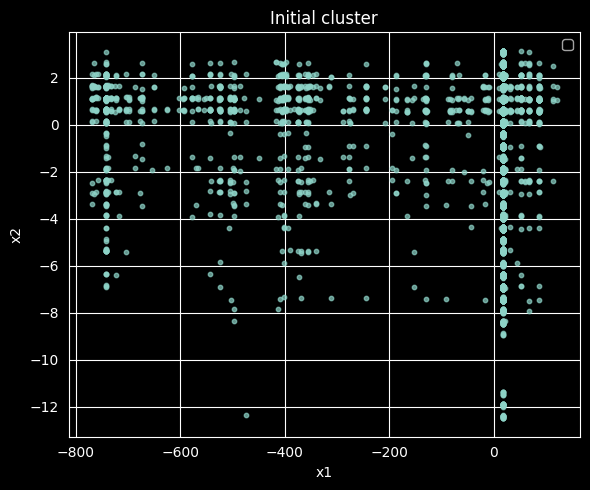

/tmp/ipykernel_76467/3828375817.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="tab10", s=10, alpha=0.7)
/tmp/ipykernel_76467/3828375817.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


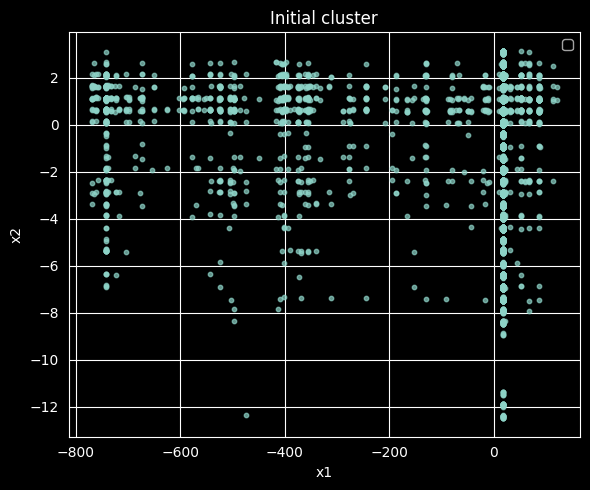

In [149]:
# Lets plot a visualization of the points to give a general idea

# Reduce to two dimensions
X_pca_2d = PCA(n_components=2).fit_transform(X_scaled)
plot_scatter(X_pca_2d, None, 'Initial cluster')

Given that:

1.   **DBSCAN** (density-based, auto-detects noise, no need for k)
2.   **BIRCH** (hierarchical + incremental, scalable)
3.   **CURE** (hierarchical with multiple representatives per cluster)
4.   **KMeans** (centroid-based, fast, assumes spherical clusters)

The initial analysis shows that the cluster is not spherical and not well-separated (possible by the reduction), it Continuous and ,manifold-like with a possibly hierarchical or density-based structure inside


Let's start with Birch

# BIRCH

In [150]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from scipy.stats import uniform, randint
from sklearn.model_selection import ParameterSampler
from scipy.stats import chi2_contingency

In [151]:
def describe_subclusters(model):
    scs = model.subcluster_centers_
    n_subclusters = scs.shape[0]
    print(f'Number of leaf subclusters: {n_subclusters}')
    if hasattr(model, 'labels_'):
        print(f'Final clusters (unique labels): {np.unique(model.labels_)}')

In [152]:
# Initial training with no params defaults (threshold=0.5, branching_factor=50, n_clusters=3)
birch = Birch()
birch.fit(X_scaled)
initial_labels = birch.labels_
initial_silhouette = silhouette_score(X_scaled, initial_labels)

Silhouette Score is 0.9770627143113282


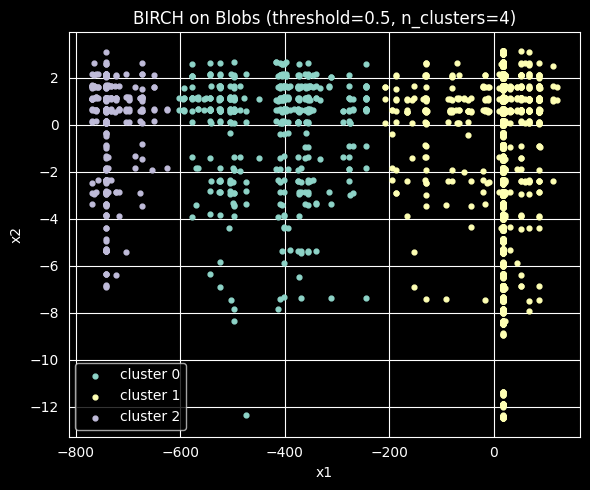

Silhouette Score is 0.9770627143113282


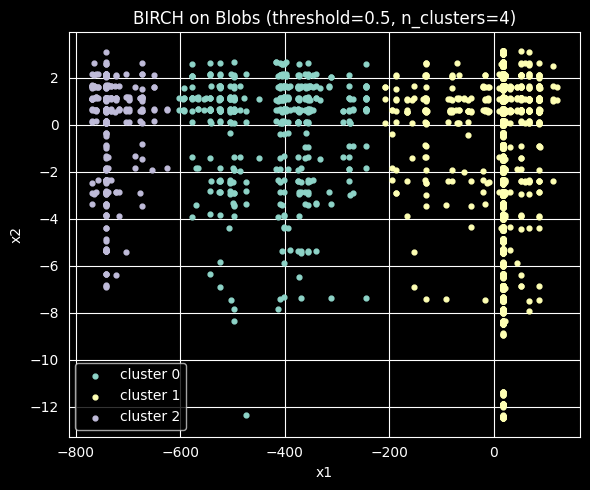

In [153]:
print(f"Silhouette Score is {initial_silhouette}")
plot_scatter(X_pca_2d, initial_labels,
             'BIRCH on Blobs (threshold=0.5, n_clusters=4)')

In [154]:
def compute_birch_with_hyperparams(X_data, param_distributions):
    results = []

    param_list = list(
        ParameterSampler(
            param_distributions,
            n_iter=50,
            random_state=21423
        )
    )

    for params in param_list:
        model = Birch(**params)
        labels = model.fit_predict(X_data)

        n_clusters = len(np.unique(labels))
        # Make sure we are subdividing data and not 1 cluster per data point
        if n_clusters < 2 or n_clusters >= len(X_data):
            continue

        sil = silhouette_score(X_data, labels)

        results.append({
            **params,
            "silhouette": sil,
            "labels": labels
        })

    return results

In [155]:
param_distributions = {
    "threshold": uniform(0.1, 2.0),
    "branching_factor": randint(20, 100),
    "n_clusters": randint(2, 10)
}

results = compute_birch_with_hyperparams(X_scaled, param_distributions)

In [156]:
df = pd.DataFrame(results).sort_values("silhouette", ascending=False)
df.head(10)

branching_factor  n_clusters  threshold  silhouette  \
0                 77           3   1.676345    0.977063   
1                 95           3   1.276303    0.977063   
11                23           3   1.569985    0.977063   
16                32           3   0.979909    0.977063   
10                33           3   1.925853    0.977063   
31                80           3   0.492829    0.977063   
34                98           3   2.079532    0.977063   
36                57           3   0.220053    0.977063   
40                71           3   1.371848    0.977063   
5                 50           2   1.962411    0.976918   

                                               labels  
0   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
11  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
16  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
10  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
31  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
34  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
36  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
40  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
5   [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...

branching_factor  n_clusters  threshold  silhouette  \
0                 77           3   1.676345    0.977063   
1                 95           3   1.276303    0.977063   
11                23           3   1.569985    0.977063   
16                32           3   0.979909    0.977063   
10                33           3   1.925853    0.977063   
31                80           3   0.492829    0.977063   
34                98           3   2.079532    0.977063   
36                57           3   0.220053    0.977063   
40                71           3   1.371848    0.977063   
5                 50           2   1.962411    0.976918   

                                               labels  
0   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
11  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
16  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
10  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
31  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
34  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
36  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
40  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
5   [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...

In [157]:
df_best = df.iloc[0]
best_labels = df_best.labels
best_silhouette = df_best.silhouette

if best_silhouette > initial_silhouette:
    print(
        f"Silhouette Score increase from {initial_silhouette} to {best_silhouette}")
elif best_silhouette < initial_silhouette:
    print(
        f"Silhouette Score decreased from {initial_silhouette} to {best_silhouette}")
else:
    print(f"Silhouette Score didn't improved from {initial_silhouette}")

print(f"Labels where different? {np.all(best_labels != initial_silhouette)}")

Silhouette Score didn't improved from 0.9770627143113282
Labels where different? True
Silhouette Score didn't improved from 0.9770627143113282
Labels where different? True


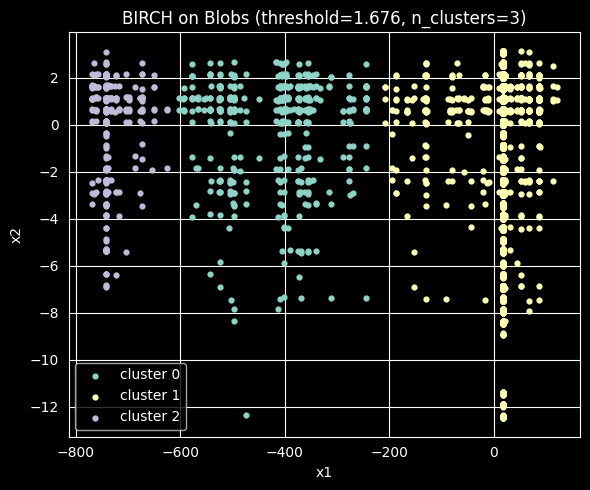

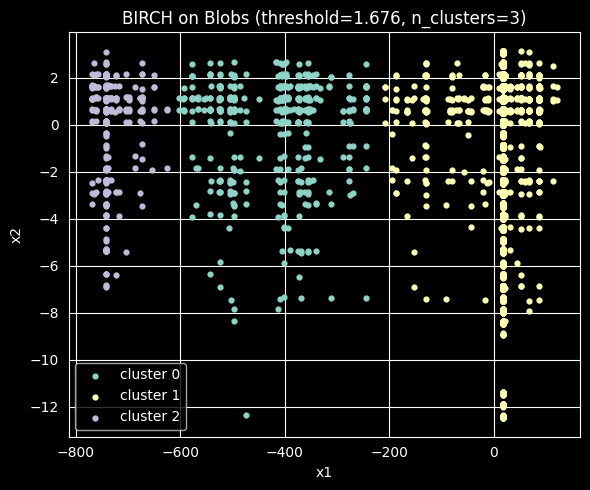

In [158]:
plot_scatter(X_pca_2d, best_labels,
             f'BIRCH on Blobs (threshold={round(df_best.threshold, 3)}, n_clusters={df_best.n_clusters})')

In [159]:
df_clus["labels"] = best_labels

In [160]:
df_clus.head(5)

age  sex  date_of_first_symptoms  admission_date  fever_temperature  \
0   47    0                  738156          738156               38.2   
1   23    0                  738156          738156               37.0   
2   26    0                  738156          738156               38.0   
3   60    0                  738156          738156               36.5   
4   72    0                  738146          738146               36.9   

   oxygen_saturation  history_of_fever  cough  sore_throat  runny_nose  ...  \
0               96.0                 0      0            0           0  ...   
1               96.0                 1      0            1           0  ...   
2               95.0                 1      1            0           0  ...   
3               95.0                 0      0            0           0  ...   
4               96.0                 0      0            0           0  ...   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         0                         0                       0   

   dementia  tuberculosis  smoking  other_risks  pcr_result  \
0         0             0        0            0           1   
1         0             0        0            0           1   
2         0             0        0            0           1   
3         0             0        0            0           1   
4         0             0        0            0           1   

   nationality_numeric  labels  
0                  792       1  
1                  792       1  
2                  792       1  
3                  792       1  
4                  792       1  

[5 rows x 53 columns]

age  sex  date_of_first_symptoms  admission_date  fever_temperature  \
0   47    0                  738156          738156               38.2   
1   23    0                  738156          738156               37.0   
2   26    0                  738156          738156               38.0   
3   60    0                  738156          738156               36.5   
4   72    0                  738146          738146               36.9   

   oxygen_saturation  history_of_fever  cough  sore_throat  runny_nose  ...  \
0               96.0                 0      0            0           0  ...   
1               96.0                 1      0            1           0  ...   
2               95.0                 1      1            0           0  ...   
3               95.0                 0      0            0           0  ...   
4               96.0                 0      0            0           0  ...   

   diabetes_mellitus_type_1  diabetes_mellitus_type_2  rheumatologic_disorder  \
0                         0                         0                       0   
1                         0                         0                       0   
2                         0                         0                       0   
3                         0                         0                       0   
4                         0                         0                       0   

   dementia  tuberculosis  smoking  other_risks  pcr_result  \
0         0             0        0            0           1   
1         0             0        0            0           1   
2         0             0        0            0           1   
3         0             0        0            0           1   
4         0             0        0            0           1   

   nationality_numeric  labels  
0                  792       1  
1                  792       1  
2                  792       1  
3                  792       1  
4                  792       1  

[5 rows x 53 columns]

In [161]:
df_clus.describe()
desc = (df_clus.groupby("labels").describe())

In [162]:
desc

age                                                          sex  \
          count       mean        std  min   25%   50%   75%    max    count   
labels                                                                         
0         503.0  38.512922  13.701547  4.0  28.0  37.0  47.0   78.0    503.0   
1       25397.0  43.103674  18.199798 -1.0  29.0  40.0  56.0  100.0  25397.0   
2         337.0  34.905045  12.143850  3.0  29.0  32.0  39.0   86.0    337.0   

                  ... pcr_result      nationality_numeric              \
            mean  ...        75%  max               count        mean   
labels            ...                                                   
0       0.387674  ...        1.0  1.0               503.0  350.417495   
1       0.418238  ...        1.0  1.0             25397.0  791.674135   
2       0.427300  ...        1.0  1.0               337.0   39.142433   

                                                      
              std    min    25%    50%    75%    max  
labels                                                
0       88.177658  170.0  272.0  372.0  412.0  528.0  
1       11.749135  566.0  792.0  792.0  792.0  894.0  
2       27.102383    4.0   31.0   31.0   36.0  148.0  

[3 rows x 416 columns]

age                                                          sex  \
          count       mean        std  min   25%   50%   75%    max    count   
labels                                                                         
0         503.0  38.512922  13.701547  4.0  28.0  37.0  47.0   78.0    503.0   
1       25397.0  43.103674  18.199798 -1.0  29.0  40.0  56.0  100.0  25397.0   
2         337.0  34.905045  12.143850  3.0  29.0  32.0  39.0   86.0    337.0   

                  ... pcr_result      nationality_numeric              \
            mean  ...        75%  max               count        mean   
labels            ...                                                   
0       0.387674  ...        1.0  1.0               503.0  350.417495   
1       0.418238  ...        1.0  1.0             25397.0  791.674135   
2       0.427300  ...        1.0  1.0               337.0   39.142433   

                                                      
              std    min    25%    50%    75%    max  
labels                                                
0       88.177658  170.0  272.0  372.0  412.0  528.0  
1       11.749135  566.0  792.0  792.0  792.0  894.0  
2       27.102383    4.0   31.0   31.0   36.0  148.0  

[3 rows x 416 columns]

We can't make analsis of discriminative features based only on STD, min and max since boolean features don't provide information

In [163]:
# Get all bool features
bool_features = [
    c for c in df_clus.columns
    if df_clus[c].dropna().isin([0, 1]).all()
    and c != "labels"
]

bool_features

['sex',
 'history_of_fever',
 'cough',
 'sore_throat',
 'runny_nose',
 'wheezing',
 'shortness_of_breath',
 'lower_chest_wall_indrawing',
 'chest_pain',
 'conjunctivitis',
 'lymphadenopathy',
 'headache',
 'loss_of_smell',
 'loss_of_taste',
 'fatigue_malaise',
 'anorexia',
 'altered_consciousness_confusion',
 'muscle_aches',
 'joint_pain',
 'inability_to_walk',
 'abdominal_pain',
 'diarrhoea',
 'vomiting_nausea',
 'skin_rash',
 'bleeding',
 'other_symptoms',
 'chronic_cardiac_disease',
 'hypertension',
 'chronic_pulmonary_disease',
 'asthma',
 'chronic_kidney_disease',
 'obesity',
 'liver_disease',
 'asplenia',
 'chronic_neurological_disorder',
 'malignant_neoplasm',
 'chronic_hematologic_disease',
 'aids_hiv',
 'diabetes_mellitus_type_1',
 'diabetes_mellitus_type_2',
 'rheumatologic_disorder',
 'dementia',
 'tuberculosis',
 'smoking',
 'other_risks',
 'pcr_result']

['sex',
 'history_of_fever',
 'cough',
 'sore_throat',
 'runny_nose',
 'wheezing',
 'shortness_of_breath',
 'lower_chest_wall_indrawing',
 'chest_pain',
 'conjunctivitis',
 'lymphadenopathy',
 'headache',
 'loss_of_smell',
 'loss_of_taste',
 'fatigue_malaise',
 'anorexia',
 'altered_consciousness_confusion',
 'muscle_aches',
 'joint_pain',
 'inability_to_walk',
 'abdominal_pain',
 'diarrhoea',
 'vomiting_nausea',
 'skin_rash',
 'bleeding',
 'other_symptoms',
 'chronic_cardiac_disease',
 'hypertension',
 'chronic_pulmonary_disease',
 'asthma',
 'chronic_kidney_disease',
 'obesity',
 'liver_disease',
 'asplenia',
 'chronic_neurological_disorder',
 'malignant_neoplasm',
 'chronic_hematologic_disease',
 'aids_hiv',
 'diabetes_mellitus_type_1',
 'diabetes_mellitus_type_2',
 'rheumatologic_disorder',
 'dementia',
 'tuberculosis',
 'smoking',
 'other_risks',
 'pcr_result']

In [164]:
continous_features = list(
    set(df_clus.columns) - set(bool_features) - {"labels"}
)

continous_features

['fever_temperature',
 'age',
 'nationality_numeric',
 'admission_date',
 'date_of_first_symptoms',
 'oxygen_saturation']

['fever_temperature',
 'age',
 'nationality_numeric',
 'admission_date',
 'date_of_first_symptoms',
 'oxygen_saturation']

In [165]:
# Check if date encoded features are significant

(df_clus["admission_date"] - df_clus["date_of_first_symptoms"]).unique()

array([0])

array([0])

In [166]:
# Since all values are 0, is not significantly good
continous_features.remove("admission_date")
continous_features.remove("date_of_first_symptoms")

desc_cont = (df_clus.groupby("labels")[continous_features].describe())
desc_cont

fever_temperature                                                     \
                   count       mean       std   min   25%   50%   75%   max   
labels                                                                        
0                  503.0  37.279373  0.765660  36.1  36.7  37.1  37.9  39.4   
1                25397.0  37.344395  0.766768  34.8  36.7  37.2  38.0  40.1   
2                  337.0  37.334382  0.777626  36.1  36.7  37.3  37.9  39.2   

            age             ... nationality_numeric        oxygen_saturation  \
          count       mean  ...                 75%    max             count   
labels                      ...                                                
0         503.0  38.512922  ...               412.0  528.0             503.0   
1       25397.0  43.103674  ...               792.0  894.0           25397.0   
2         337.0  34.905045  ...                36.0  148.0             337.0   

                                                            
             mean       std   min   25%   50%   75%    max  
labels                                                      
0       93.855104  4.401709  69.0  93.5  95.0  96.0   99.0  
1       93.832764  4.573024  69.0  94.0  95.0  96.0  100.0  
2       93.723331  4.345881  80.0  92.0  95.0  96.0  100.0  

[3 rows x 32 columns]

fever_temperature                                                     \
                   count       mean       std   min   25%   50%   75%   max   
labels                                                                        
0                  503.0  37.279373  0.765660  36.1  36.7  37.1  37.9  39.4   
1                25397.0  37.344395  0.766768  34.8  36.7  37.2  38.0  40.1   
2                  337.0  37.334382  0.777626  36.1  36.7  37.3  37.9  39.2   

            age             ... nationality_numeric        oxygen_saturation  \
          count       mean  ...                 75%    max             count   
labels                      ...                                                
0         503.0  38.512922  ...               412.0  528.0             503.0   
1       25397.0  43.103674  ...               792.0  894.0           25397.0   
2         337.0  34.905045  ...                36.0  148.0             337.0   

                                                            
             mean       std   min   25%   50%   75%    max  
labels                                                      
0       93.855104  4.401709  69.0  93.5  95.0  96.0   99.0  
1       93.832764  4.573024  69.0  94.0  95.0  96.0  100.0  
2       93.723331  4.345881  80.0  92.0  95.0  96.0  100.0  

[3 rows x 32 columns]

### Continous Variables analysis 
#### Between-cluster mean separation

For each feature:

- Compute the mean of that feature inside each cluster
- Take the standard deviation of those means

**Ej**: Each clusters mean differ from each other X...

In [167]:
# How far apart are cluster centers for each feature? (More is better)
mean_sep = (desc_cont.xs("mean", level=1, axis=1).std(axis=0))
mean_sep.sort_values(ascending=False)

nationality_numeric    378.132152
age                      4.109122
oxygen_saturation        0.070520
fever_temperature        0.035010
dtype: float64

nationality_numeric    378.132152
age                      4.109122
oxygen_saturation        0.070520
fever_temperature        0.035010
dtype: float64

#### Values within cluster

For each feature:

- Compute the std inside each cluster
- Average those std values across clusters

**Ej**: Inside each cluster, patients’ features differ by: X....

In [168]:
# How tight is each cluster?  (Less is better)
within_std = (desc_cont.xs("std", level=1, axis=1).mean(axis=0))
within_std.sort_values(ascending=True)

fever_temperature       0.770018
oxygen_saturation       4.440205
age                    14.681732
nationality_numeric    42.343059
dtype: float64

fever_temperature       0.770018
oxygen_saturation       4.440205
age                    14.681732
nationality_numeric    42.343059
dtype: float64

### Discriminative Ratio

How many within-cluster standard deviations apart are the clusters?

Ej: 

```
 |---- cluster 0 ----|
        |---- cluster 1 ----|
                |---- cluster 2 ----|
```

- < 0.05	Centers are tiny compared to spread
- 0.05 – 0.1	Almost total overlap
- 0.1 – 0.3	Partial separation
- 0.3 – 0.5	Clear but overlapping
- 0.5 – 1.0	Strong separation
- 1.0	Very strong / suspicious

In [169]:
disc_ratio = mean_sep / within_std
disc_ratio.sort_values(ascending=True)

oxygen_saturation      0.015882
fever_temperature      0.045466
age                    0.279880
nationality_numeric    8.930204
dtype: float64

oxygen_saturation      0.015882
fever_temperature      0.045466
age                    0.279880
nationality_numeric    8.930204
dtype: float64

Analysis suggest that **oxygen_saturation** and **fever_temperature** should be dropped since there values are close. While **Nationality Numeric** is to high. Hot-encoded labels don't have any numerical signficance. **Age** should be the only meaningful variable.

However, given the importance in medical practice maybe it´s better to keep *oxygen_saturation** and **fever_temperature** and join them as one.

### Boolean Variables analysis 

What is the probability of being 1 change across clusters? Strength association

In [170]:
# Interpretability (how big is the effect?)

p = df_clus.groupby("labels")[bool_features].mean()
delta_p = p.max() - p.min()

delta_p.sort_values(ascending=False)

pcr_result                         0.440795
history_of_fever                   0.285408
fatigue_malaise                    0.207224
sore_throat                        0.163668
cough                              0.136973
muscle_aches                       0.117646
headache                           0.093984
runny_nose                         0.055968
hypertension                       0.055394
diarrhoea                          0.054882
smoking                            0.047075
shortness_of_breath                0.044646
asthma                             0.041572
vomiting_nausea                    0.039860
sex                                0.039626
abdominal_pain                     0.020742
lower_chest_wall_indrawing         0.007524
wheezing                           0.007462
chest_pain                         0.006522
altered_consciousness_confusion    0.005964
tuberculosis                       0.005935
malignant_neoplasm                 0.005935
chronic_neurological_disorder   

pcr_result                         0.440795
history_of_fever                   0.285408
fatigue_malaise                    0.207224
sore_throat                        0.163668
cough                              0.136973
muscle_aches                       0.117646
headache                           0.093984
runny_nose                         0.055968
hypertension                       0.055394
diarrhoea                          0.054882
smoking                            0.047075
shortness_of_breath                0.044646
asthma                             0.041572
vomiting_nausea                    0.039860
sex                                0.039626
abdominal_pain                     0.020742
lower_chest_wall_indrawing         0.007524
wheezing                           0.007462
chest_pain                         0.006522
altered_consciousness_confusion    0.005964
tuberculosis                       0.005935
malignant_neoplasm                 0.005935
chronic_neurological_disorder   

In [171]:
"""
How strong is the association?
If I know the cluster label, how much can I guess whether this feature is 0 or 1?

    - < 0.05	No discrimination
    - 0.05 - 0.10	Weak
    - 0.10 - 0.20	Moderate
    - 0.20 - 0.30	Strong
    - > 0.30	Very strong

Ej: 

| Cluster | % Fever |
| ------- | ------- |
| 0       | 5%      |
| 1       | 50%     |
| 2       | 95%     |

If cluster = 0 → guess no
If cluster = 2 → guess yes

"""


def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    chi2 = chi2_contingency(ct)[0]
    n = ct.values.sum()
    k = min(ct.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

In [172]:
cramers_table = pd.Series(
    {
        c: cramers_v(df_clus[c], df_clus["labels"])
        for c in bool_features
    },
    name="cramers_v"
).sort_values(ascending=False)

cramers_table

pcr_result                         0.185009
history_of_fever                   0.080965
fatigue_malaise                    0.059368
sore_throat                        0.050194
cough                              0.043092
muscle_aches                       0.040893
headache                           0.035368
smoking                            0.028498
hypertension                       0.026808
diarrhoea                          0.023141
runny_nose                         0.022652
shortness_of_breath                0.022264
lower_chest_wall_indrawing         0.022063
vomiting_nausea                    0.019556
asthma                             0.019234
chronic_neurological_disorder      0.018536
abdominal_pain                     0.014669
tuberculosis                       0.014395
altered_consciousness_confusion    0.014310
wheezing                           0.013049
loss_of_taste                      0.011067
chest_pain                         0.010893
lymphadenopathy                 

pcr_result                         0.185009
history_of_fever                   0.080965
fatigue_malaise                    0.059368
sore_throat                        0.050194
cough                              0.043092
muscle_aches                       0.040893
headache                           0.035368
smoking                            0.028498
hypertension                       0.026808
diarrhoea                          0.023141
runny_nose                         0.022652
shortness_of_breath                0.022264
lower_chest_wall_indrawing         0.022063
vomiting_nausea                    0.019556
asthma                             0.019234
chronic_neurological_disorder      0.018536
abdominal_pain                     0.014669
tuberculosis                       0.014395
altered_consciousness_confusion    0.014310
wheezing                           0.013049
loss_of_taste                      0.011067
chest_pain                         0.010893
lymphadenopathy                 

In [173]:
bool_summary = pd.DataFrame({
    "delta_p": delta_p,
    "cramers_v": cramers_table
}).sort_values(
    ["cramers_v", "delta_p"],
    ascending=False
)

# Given the spread of values is low select everyone who is above the no discrimination category (Cramer V) and has a large delta

selected_bool = bool_summary.query(
    "cramers_v >= 0.05 and delta_p >= 0.05"
).index

selected_bool = list(selected_bool)

selected_bool

['pcr_result', 'history_of_fever', 'fatigue_malaise', 'sore_throat']

['pcr_result', 'history_of_fever', 'fatigue_malaise', 'sore_throat']

While the result recomends **pcr_result** and **history_of_fever** I'm not convinced of the utility of them. I would also add **headache**

In [174]:
### Recompute with selected variables
selected_bool.remove('pcr_result')
selected_bool.remove('history_of_fever')
selected_bool.append('headache')
selected_bool

['fatigue_malaise', 'sore_throat', 'headache']

['fatigue_malaise', 'sore_throat', 'headache']

In [175]:
from itertools import combinations

def pairwise_overlap_analysis(df, cluster_col, cont_cols, bool_cols):

    clusters = df[cluster_col].unique()
    results = {}

    # -------- Continuous Features --------
    for col in cont_cols:
        max_overlap = 0

        for c1, c2 in combinations(clusters, 2):
            vals1 = df[df[cluster_col] == c1][col]
            vals2 = df[df[cluster_col] == c2][col]

            min1, max1 = vals1.min(), vals1.max()
            min2, max2 = vals2.min(), vals2.max()

            intersection = max(0, min(max1, max2) - max(min1, min2))
            union = max(max1, max2) - min(min1, min2)

            overlap = intersection / (union + 1e-9)
            max_overlap = max(max_overlap, overlap)

        results[col] = 1 - max_overlap

    # -------- Boolean Features --------
    for col in bool_cols:
        props = df.groupby(cluster_col)[col].mean()

        max_overlap = 0
        for c1, c2 in combinations(clusters, 2):
            overlap = 1 - abs(props[c1] - props[c2])
            max_overlap = max(max_overlap, overlap)

        results[col] = 1 - max_overlap

    return pd.Series(results).sort_values(ascending=False)

In [ ]:
df_clus.info()

In [176]:
pairwise_overlap_analysis(df_clus, "labels", continous_features, bool_features)

nationality_numeric                1.000000
pcr_result                         0.181911
age                                0.108434
history_of_fever                   0.097597
fever_temperature                  0.060606
fatigue_malaise                    0.057842
sore_throat                        0.056601
cough                              0.052696
headache                           0.041014
oxygen_saturation                  0.032258
runny_nose                         0.023799
diarrhoea                          0.019658
asthma                             0.015190
vomiting_nausea                    0.014483
hypertension                       0.012495
sex                                0.009061
abdominal_pain                     0.007924
shortness_of_breath                0.007510
muscle_aches                       0.005270
malignant_neoplasm                 0.002785
chronic_cardiac_disease            0.001988
joint_pain                         0.001959
bleeding                        

nationality_numeric                1.000000
pcr_result                         0.181911
age                                0.108434
history_of_fever                   0.097597
fever_temperature                  0.060606
fatigue_malaise                    0.057842
sore_throat                        0.056601
cough                              0.052696
headache                           0.041014
oxygen_saturation                  0.032258
runny_nose                         0.023799
diarrhoea                          0.019658
asthma                             0.015190
vomiting_nausea                    0.014483
hypertension                       0.012495
sex                                0.009061
abdominal_pain                     0.007924
shortness_of_breath                0.007510
muscle_aches                       0.005270
malignant_neoplasm                 0.002785
chronic_cardiac_disease            0.001988
joint_pain                         0.001959
bleeding                        

### Recompute cluster with selected variables

In [177]:
id_cols = selected_bool + ["age"]
df_reduced = merged_hospitals[id_cols].copy()

reduction = merged_hospitals[["oxygen_saturation", "fever_temperature"]]
x_tmp = scaler.fit_transform(df_reduced)
df_reduced["oxygen_fever"] = PCA(n_components=1).fit_transform(x_tmp)
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fatigue_malaise  26237 non-null  int64  
 1   sore_throat      26237 non-null  int64  
 2   headache         26237 non-null  int64  
 3   age              26237 non-null  int64  
 4   oxygen_fever     26237 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26237 entries, 0 to 26236
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fatigue_malaise  26237 non-null  int64  
 1   sore_throat      26237 non-null  int64  
 2   headache         26237 non-null  int64  
 3   age              26237 non-null  int64  
 4   oxygen_fever     26237 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.0 MB


In [178]:
# Scale the value based on the median to handle outliers
X_reduced = scaler.fit_transform(df_reduced)

/tmp/ipykernel_76467/3828375817.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="tab10", s=10, alpha=0.7)
/tmp/ipykernel_76467/3828375817.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


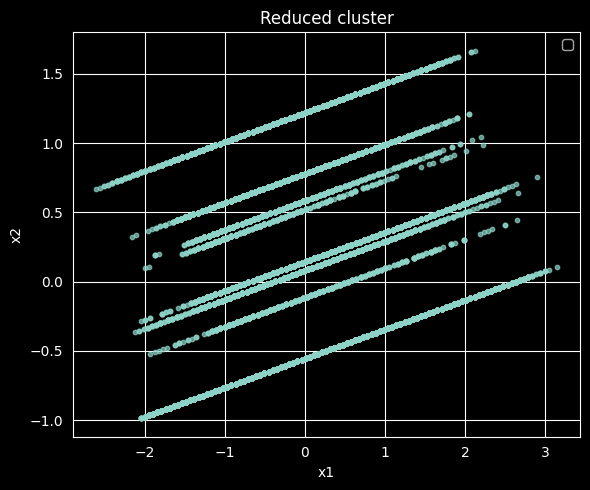

/tmp/ipykernel_76467/3828375817.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap="tab10", s=10, alpha=0.7)
/tmp/ipykernel_76467/3828375817.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


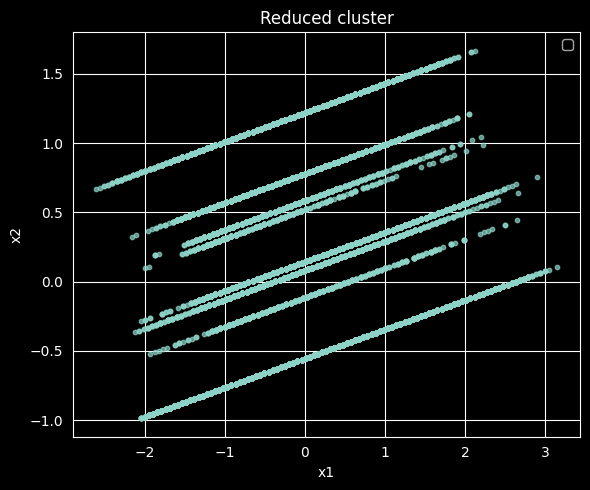

In [179]:
# Lets plot a visualization of the points to give a general idea

# Reduce to two dimensions
X_pca_2d_reduced = PCA(n_components=2).fit_transform(X_reduced)
plot_scatter(X_pca_2d_reduced, None, 'Reduced cluster')

2D plot doesn´t really help. Let´s try with 3D

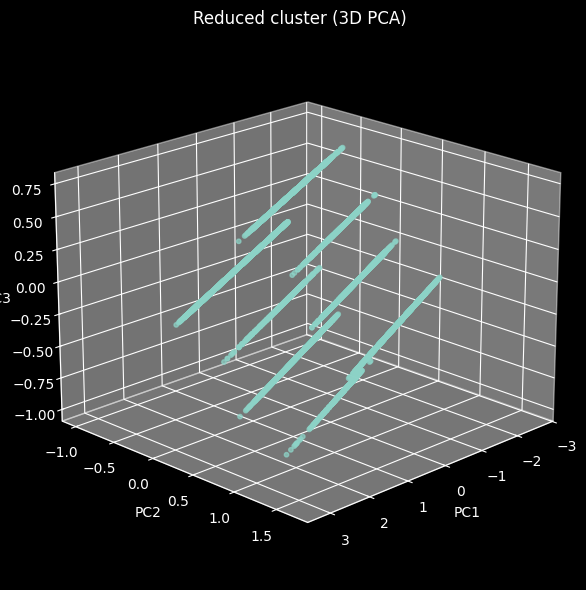

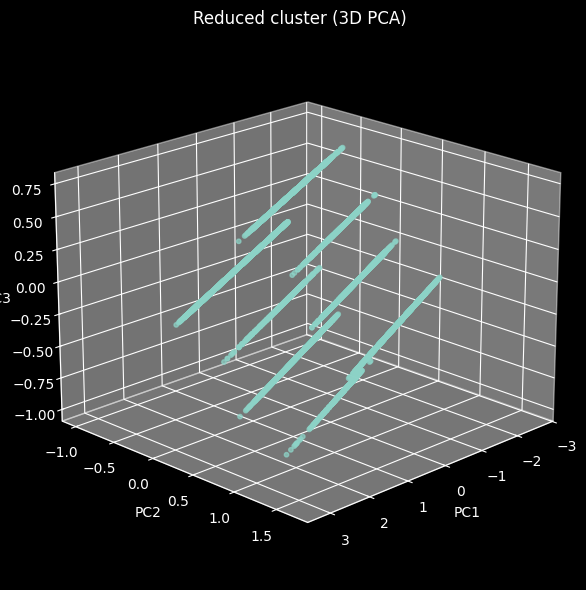

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

def plot_scatter_3d(X, labels=None, title="3D scatter", elevation=20, azim=45):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection="3d")

    if isinstance(labels, np.ndarray) and labels.size != 0:
        for lb in np.unique(labels):
            mask = labels == lb
            ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], s=12, alpha=0.8, label=f"cluster {lb}")
        ax.legend(loc="best")
    else:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=10, alpha=0.7)

    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    # Rotate view
    ax.view_init(elev=elevation, azim=azim)

    plt.tight_layout()
    plt.show()


X_pca_3d_reduced = PCA(n_components=3).fit_transform(X_reduced)
plot_scatter_3d(X_pca_3d_reduced, labels=None, title="Reduced cluster (3D PCA)")

Best DBSCAN parameters: {'eps': 0.5, 'min_samples': 5}
Best silhouette score: 0.3010
Number of clusters: 8
Number of noise points: 0


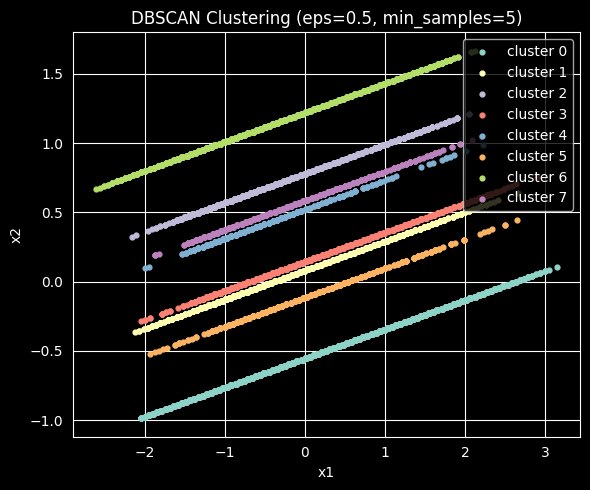

Best DBSCAN parameters: {'eps': 0.5, 'min_samples': 5}
Best silhouette score: 0.3010
Number of clusters: 8
Number of noise points: 0


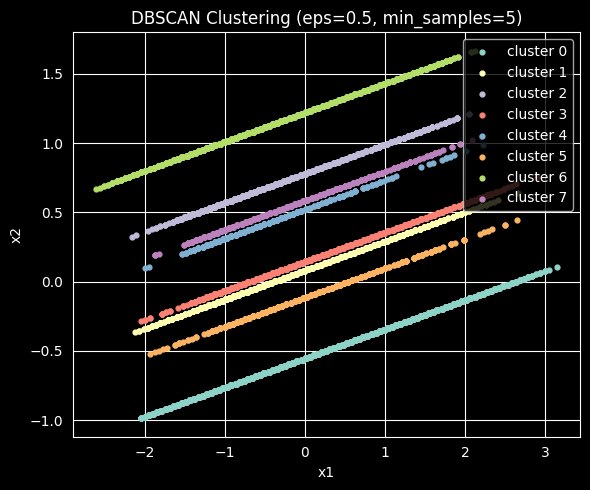

In [181]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN implementation with parameter tuning
# eps: maximum distance between two samples for them to be considered in the same neighborhood
# min_samples: minimum number of samples in a neighborhood for a point to be considered a core point

# Try different parameters to find optimal clustering
best_score = -1
best_params = {}
best_labels = None

eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [5, 10, 15, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_reduced)
        
        # Calculate number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Only compute silhouette if we have at least 2 clusters and not all points are noise
        if n_clusters >= 2 and n_noise < len(labels):
            score = silhouette_score(X_reduced, labels)
            
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels
                best_n_clusters = n_clusters
                best_n_noise = n_noise

print(f"Best DBSCAN parameters: {best_params}")
print(f"Best silhouette score: {best_score:.4f}")
print(f"Number of clusters: {best_n_clusters}")
print(f"Number of noise points: {best_n_noise}")

# Fit final model with best parameters
dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
dbscan_labels = dbscan_best.fit_predict(X_reduced)

# Visualize the results
X_pca_2d_dbscan = PCA(n_components=2).fit_transform(X_reduced)
plot_scatter(X_pca_2d_dbscan, dbscan_labels, f'DBSCAN Clustering (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})')

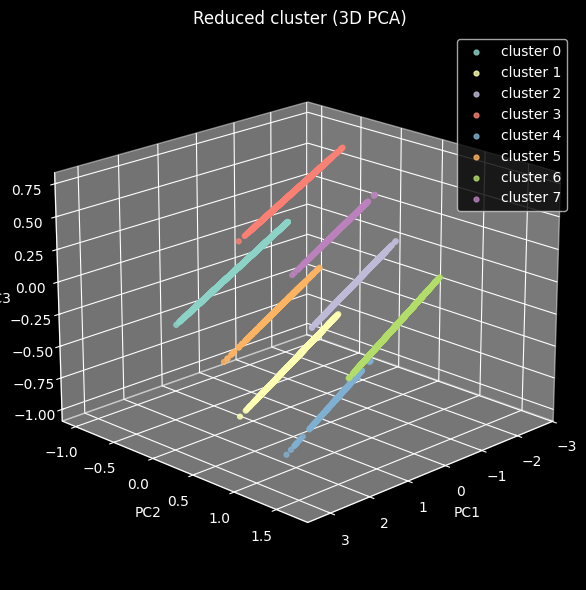

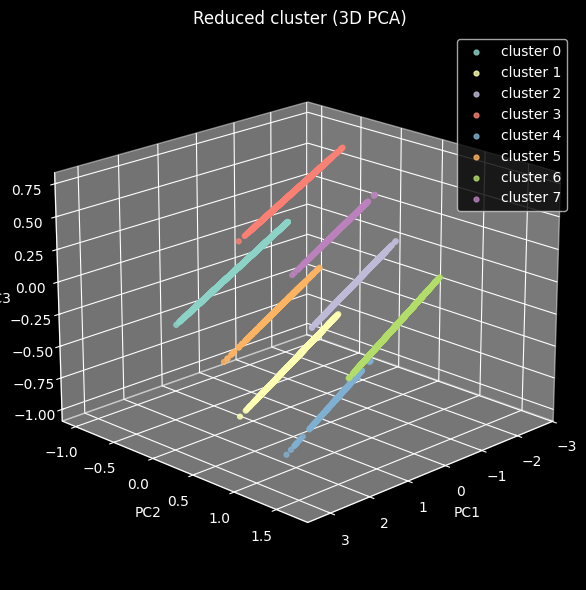

In [182]:
X_pca_3d_reduced = PCA(n_components=3).fit_transform(X_reduced)
plot_scatter_3d(X_pca_3d_reduced, labels=dbscan_labels, title="Reduced cluster (3D PCA)")

Let's Compare it to BURCH

In [87]:
param_distributions = {
    "threshold": uniform(0.1, 1.0),
    "branching_factor": randint(20, 100),
    "n_clusters": randint(2, 9)
}

results = compute_birch_with_hyperparams(X_scaled, param_distributions)


KeyboardInterrupt



In [88]:
df_birch_redu_res = pd.DataFrame(results).sort_values(
    "silhouette", ascending=False)
df_birch_redu_res.head(10)

branching_factor  n_clusters  threshold  silhouette  \
0                 77           3   0.888172    0.977063   
1                 95           3   0.688151    0.977063   
6                 30           3   0.727863    0.977063   
13                76           3   0.507794    0.977063   
11                23           3   0.834993    0.977063   
10                33           3   1.012927    0.977063   
46                86           3   0.700567    0.977063   
35                78           3   0.994275    0.977063   
39                71           3   0.735924    0.977063   
30                80           3   0.296415    0.977063   

                                               labels  
0   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
6   [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
13  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
11  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
10  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
46  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
35  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
39  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...  
30  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...

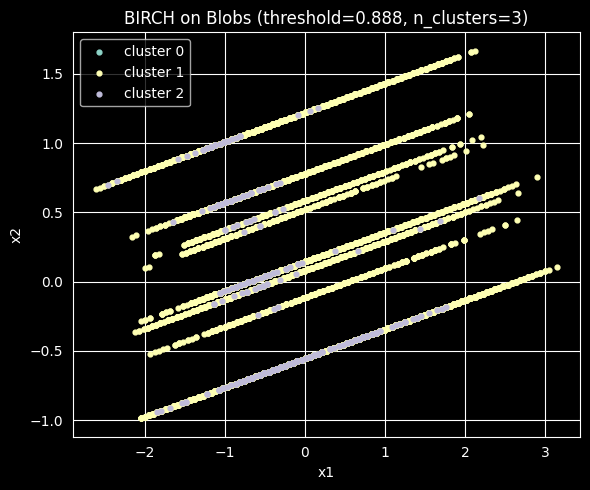

In [89]:
df_birch_reduced = df_birch_redu_res.iloc[0]
best_burch_labels = df_birch_reduced.labels
best_silhouette = df_birch_reduced.silhouette

plot_scatter(X_pca_2d_reduced, best_burch_labels,
             f'BIRCH on Blobs (threshold={round(df_birch_reduced.threshold, 3)}, n_clusters={df_birch_reduced.n_clusters})')

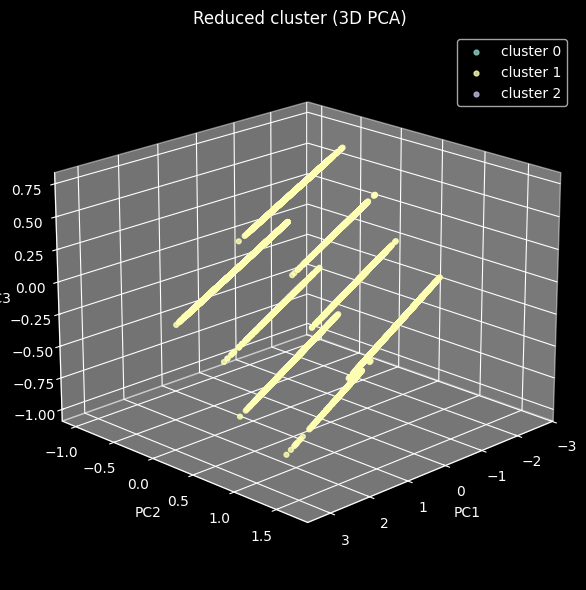

In [90]:
plot_scatter_3d(X_pca_3d_reduced, labels=best_burch_labels, title="Reduced cluster (3D PCA)", elevation=20, azim=45)

In [91]:
# Doesn't seem to be appropriate, let's count the points
arr = np.array(best_burch_labels)
values, counts = np.unique(arr, return_counts=True)

result = dict(zip(values, counts))
print(result)

{np.int64(0): np.int64(503), np.int64(1): np.int64(25397), np.int64(2): np.int64(337)}


Now with K-Means

k=2: silhouette_score=0.3765
k=3: silhouette_score=0.3684
k=4: silhouette_score=0.3199
k=5: silhouette_score=0.3423
k=6: silhouette_score=0.3846
k=7: silhouette_score=0.4118
k=8: silhouette_score=0.3887
k=9: silhouette_score=0.4179
k=10: silhouette_score=0.4402

Best K-Means parameters: k=10
Best silhouette score: 0.4402


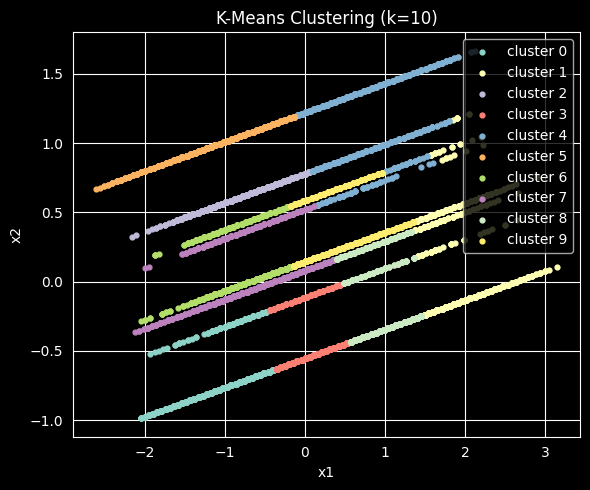

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means implementation with parameter tuning
# Try different numbers of clusters to find optimal clustering
best_score = -1
best_k = None
best_labels = None

k_values = range(2, 11)  # Try from 2 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=100)
    labels = kmeans.fit_predict(X_reduced)
    
    # Calculate silhouette score
    score = silhouette_score(X_reduced, labels)
    
    print(f"k={k}: silhouette_score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f"\nBest K-Means parameters: k={best_k}")
print(f"Best silhouette score: {best_score:.4f}")

# Fit final model with best parameters
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans_best.fit_predict(X_reduced)

# Visualize the results
X_pca_2d_kmeans = PCA(n_components=2).fit_transform(X_reduced)
plot_scatter(X_pca_2d_kmeans, kmeans_labels, f'K-Means Clustering (k={best_k})')

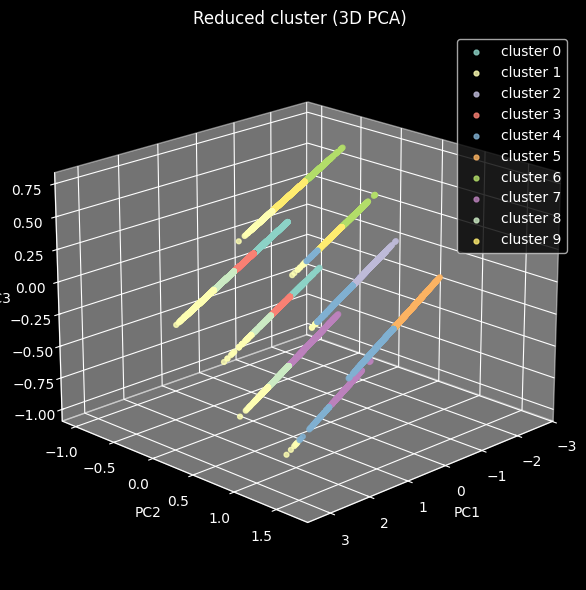

In [93]:
# Visualize the results
X_pca_2d_kmeans = PCA(n_components=3).fit_transform(X_reduced)
plot_scatter_3d(X_pca_2d_kmeans, labels=kmeans_labels, title="Reduced cluster (3D PCA)")

Based on the statistical analysis above 

In [94]:
df_clus[df_clus['labels'] == 0].describe()

age         sex  date_of_first_symptoms  admission_date  \
count  503.000000  503.000000              503.000000      503.000000   
mean    38.512922    0.387674           738088.445328   738088.445328   
std     13.701547    0.487705               97.218756       97.218756   
min      4.000000    0.000000           737852.000000   737852.000000   
25%     28.000000    0.000000           738007.000000   738007.000000   
50%     37.000000    0.000000           738108.000000   738108.000000   
75%     47.000000    1.000000           738172.000000   738172.000000   
max     78.000000    1.000000           738226.000000   738226.000000   

       fever_temperature  oxygen_saturation  history_of_fever       cough  \
count         503.000000         503.000000        503.000000  503.000000   
mean           37.279373          93.855104          0.224652    0.159046   
std             0.765660           4.401709          0.417768    0.366083   
min            36.100000          69.000000          0.000000    0.000000   
25%            36.700000          93.500000          0.000000    0.000000   
50%            37.100000          95.000000          0.000000    0.000000   
75%            37.900000          96.000000          0.000000    0.000000   
max            39.400000          99.000000          1.000000    1.000000   

       sore_throat  runny_nose  ...  diabetes_mellitus_type_1  \
count   503.000000  503.000000  ...                     503.0   
mean      0.151093    0.095427  ...                       0.0   
std       0.358496    0.294097  ...                       0.0   
min       0.000000    0.000000  ...                       0.0   
25%       0.000000    0.000000  ...                       0.0   
50%       0.000000    0.000000  ...                       0.0   
75%       0.000000    0.000000  ...                       0.0   
max       1.000000    1.000000  ...                       0.0   

       diabetes_mellitus_type_2  rheumatologic_disorder    dementia  \
count                     503.0                   503.0  503.000000   
mean                        0.0                     0.0    0.001988   
std                         0.0                     0.0    0.044588   
min                         0.0                     0.0    0.000000   
25%                         0.0                     0.0    0.000000   
50%                         0.0                     0.0    0.000000   
75%                         0.0                     0.0    0.000000   
max                         0.0                     0.0    1.000000   

       tuberculosis     smoking  other_risks  pcr_result  nationality_numeric  \
count         503.0  503.000000   503.000000  503.000000           503.000000   
mean            0.0    0.045726     0.001988    0.417495           350.417495   
std             0.0    0.209097     0.044588    0.493637            88.177658   
min             0.0    0.000000     0.000000    0.000000           170.000000   
25%             0.0    0.000000     0.000000    0.000000           272.000000   
50%             0.0    0.000000     0.000000    0.000000           372.000000   
75%             0.0    0.000000     0.000000    1.000000           412.000000   
max             0.0    1.000000     1.000000    1.000000           528.000000   

       labels  
count   503.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0  

[8 rows x 53 columns]

In [95]:
df_clus[df_clus['labels'] == 1].describe()

age           sex  date_of_first_symptoms  admission_date  \
count  25397.000000  25397.000000            25397.000000    25397.000000   
mean      43.103674      0.418238           738071.543332   738071.543332   
std       18.199798      0.493279              103.467896      103.467896   
min       -1.000000      0.000000           737850.000000   737850.000000   
25%       29.000000      0.000000           737997.000000   737997.000000   
50%       40.000000      0.000000           738081.000000   738081.000000   
75%       56.000000      1.000000           738164.000000   738164.000000   
max      100.000000      1.000000           738228.000000   738228.000000   

       fever_temperature  oxygen_saturation  history_of_fever         cough  \
count       25397.000000       25397.000000      25397.000000  25397.000000   
mean           37.344395          93.832764          0.510060      0.296019   
std             0.766768           4.573024          0.499909      0.456509   
min            34.800000          69.000000          0.000000      0.000000   
25%            36.700000          94.000000          0.000000      0.000000   
50%            37.200000          95.000000          1.000000      0.000000   
75%            38.000000          96.000000          1.000000      1.000000   
max            40.100000         100.000000          1.000000      1.000000   

        sore_throat    runny_nose  ...  diabetes_mellitus_type_1  \
count  25397.000000  25397.000000  ...              25397.000000   
mean       0.314762      0.151396  ...                  0.001772   
std        0.464430      0.358441  ...                  0.042057   
min        0.000000      0.000000  ...                  0.000000   
25%        0.000000      0.000000  ...                  0.000000   
50%        0.000000      0.000000  ...                  0.000000   
75%        1.000000      0.000000  ...                  0.000000   
max        1.000000      1.000000  ...                  1.000000   

       diabetes_mellitus_type_2  rheumatologic_disorder      dementia  \
count              25397.000000            25397.000000  25397.000000   
mean                   0.001811                0.001614      0.001536   
std                    0.042521                0.040147      0.039158   
min                    0.000000                0.000000      0.000000   
25%                    0.000000                0.000000      0.000000   
50%                    0.000000                0.000000      0.000000   
75%                    0.000000                0.000000      0.000000   
max                    1.000000                1.000000      1.000000   

       tuberculosis       smoking   other_risks    pcr_result  \
count  25397.000000  25397.000000  25397.000000  25397.000000   
mean       0.001417      0.091586      0.001102      0.858290   
std        0.037624      0.288446      0.033186      0.348759   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000   
50%        0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       nationality_numeric   labels  
count         25397.000000  25397.0  
mean            791.674135      1.0  
std              11.749135      0.0  
min             566.000000      1.0  
25%             792.000000      1.0  
50%             792.000000      1.0  
75%             792.000000      1.0  
max             894.000000      1.0  

[8 rows x 53 columns]

In [96]:
df_clus[df_clus['labels'] == 2].describe()

age         sex  date_of_first_symptoms  admission_date  \
count  337.000000  337.000000              337.000000      337.000000   
mean    34.905045    0.427300           738069.270030   738069.270030   
std     12.143850    0.495422              108.725578      108.725578   
min      3.000000    0.000000           737851.000000   737851.000000   
25%     29.000000    0.000000           737983.000000   737983.000000   
50%     32.000000    0.000000           738082.000000   738082.000000   
75%     39.000000    1.000000           738164.000000   738164.000000   
max     86.000000    1.000000           738227.000000   738227.000000   

       fever_temperature  oxygen_saturation  history_of_fever       cough  \
count         337.000000         337.000000        337.000000  337.000000   
mean           37.334382          93.723331          0.412463    0.243323   
std             0.777626           4.345881          0.493010    0.429727   
min            36.100000          80.000000          0.000000    0.000000   
25%            36.700000          92.000000          0.000000    0.000000   
50%            37.300000          95.000000          0.000000    0.000000   
75%            37.900000          96.000000          1.000000    0.000000   
max            39.200000         100.000000          1.000000    1.000000   

       sore_throat  runny_nose  ...  diabetes_mellitus_type_1  \
count   337.000000  337.000000  ...                337.000000   
mean      0.258160    0.127596  ...                  0.002967   
std       0.438273    0.334136  ...                  0.054473   
min       0.000000    0.000000  ...                  0.000000   
25%       0.000000    0.000000  ...                  0.000000   
50%       0.000000    0.000000  ...                  0.000000   
75%       1.000000    0.000000  ...                  0.000000   
max       1.000000    1.000000  ...                  1.000000   

       diabetes_mellitus_type_2  rheumatologic_disorder    dementia  \
count                337.000000                   337.0  337.000000   
mean                   0.002967                     0.0    0.002967   
std                    0.054473                     0.0    0.054473   
min                    0.000000                     0.0    0.000000   
25%                    0.000000                     0.0    0.000000   
50%                    0.000000                     0.0    0.000000   
75%                    0.000000                     0.0    0.000000   
max                    1.000000                     0.0    1.000000   

       tuberculosis     smoking  other_risks  pcr_result  nationality_numeric  \
count    337.000000  337.000000   337.000000  337.000000           337.000000   
mean       0.005935    0.044510     0.002967    0.599407            39.142433   
std        0.076922    0.206533     0.054473    0.490747            27.102383   
min        0.000000    0.000000     0.000000    0.000000             4.000000   
25%        0.000000    0.000000     0.000000    0.000000            31.000000   
50%        0.000000    0.000000     0.000000    1.000000            31.000000   
75%        0.000000    0.000000     0.000000    1.000000            36.000000   
max        1.000000    1.000000     1.000000    1.000000           148.000000   

       labels  
count   337.0  
mean      2.0  
std       0.0  
min       2.0  
25%       2.0  
50%       2.0  
75%       2.0  
max       2.0  

[8 rows x 53 columns]